# 부산광역시 재활용 정거장 위치선정을 위한 영등포구-부산 통계 비교

---

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

# 경고 메시지는 출력 X
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 한글 font 설정

import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin':           # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':        # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<Axes: title={'center': '한글타이틀'}>

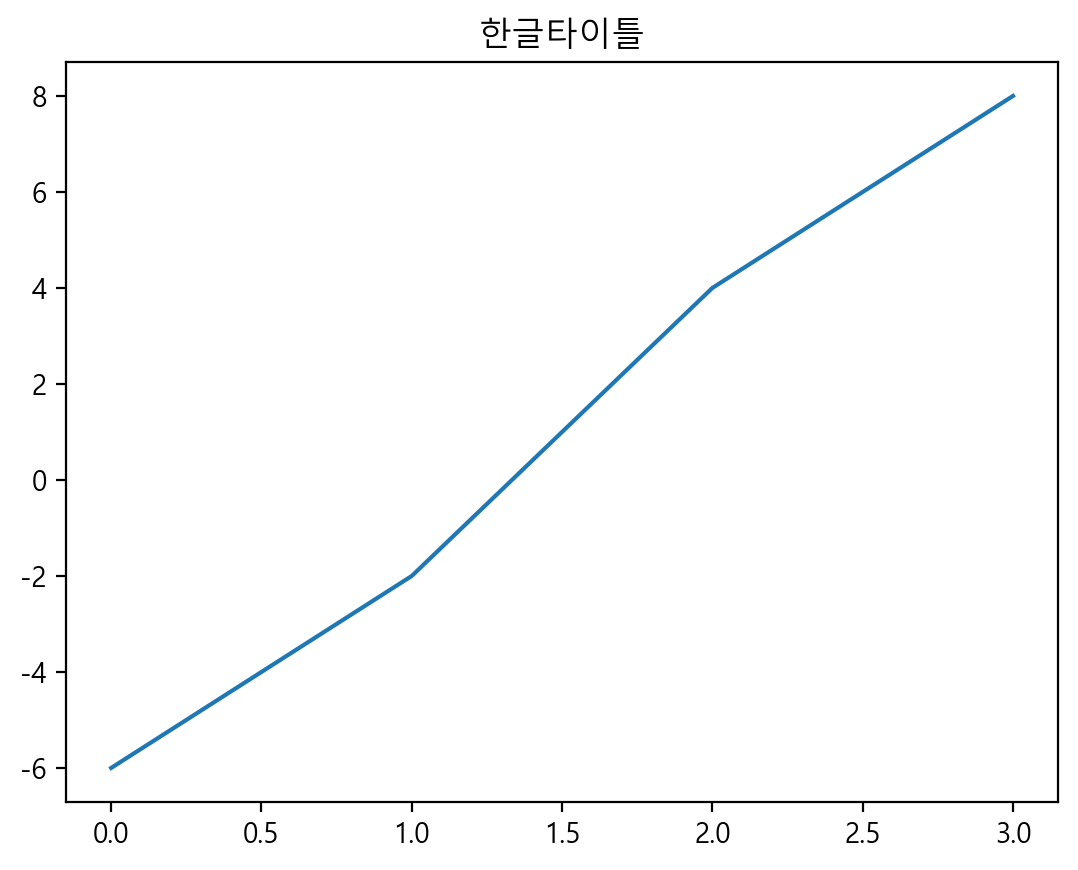

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인

pd.Series([-6, -2, 4, 8]).plot(title="한글타이틀")

In [58]:
from sklearn.metrics.pairwise import euclidean_distances

<br><br>

---

## 01. 인구 데이터 불러오기

In [5]:
## 인구 데이터
population = pd.read_csv("통계청_행정구역_시군구별_인구수_20250608215620.csv", encoding="cp949")

print(f"population shape: {population.shape}")

population shape: (17, 8)


<br><br>

---
## 02. 인구 데이터 전처리
- 2018 ~ 2023
- 영등포구의 연도별 인구 수
- 부산시 구별/연도별 인구 수

In [8]:
# cols, head 확인
print(f"cols: {population.columns}")

population.head(3)

cols: Index(['행정구역(시군구)별', '항목', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')


,행정구역(시군구)별,항목,2018,2019,2020,2021,2022,2023
0,영등포구,총인구수 (명),367778,367678,379480,376837,375675,374794
1,중구,총인구수 (명),42795,41910,41523,40524,39689,38619
2,서구,총인구수 (명),110534,108229,108135,105164,105192,104089


In [9]:
# "항목" col 제거
population_drop = population.drop(columns=['항목'])

# "행정구역(시군구)별" 칼럼명 변경 >> "구"
population_drop = population_drop.rename(columns={'행정구역(시군구)별': '구'})

# shape랑 head 다시 확인
print(f"population_drop shape: {population_drop.shape}")
population_drop.head(3)

population_drop shape: (17, 7)


,구,2018,2019,2020,2021,2022,2023
0,영등포구,367778,367678,379480,376837,375675,374794
1,중구,42795,41910,41523,40524,39689,38619
2,서구,110534,108229,108135,105164,105192,104089


In [10]:
# 자료형을 int로 변환
year_cols = ['2018', '2019', '2020', '2021', '2022', '2023']
population_drop[year_cols] = population_drop[year_cols].apply(pd.to_numeric)

population_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       17 non-null     object
 1   2018    17 non-null     int64 
 2   2019    17 non-null     int64 
 3   2020    17 non-null     int64 
 4   2021    17 non-null     int64 
 5   2022    17 non-null     int64 
 6   2023    17 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.1+ KB


In [14]:
# 2023년 기준으로 내림차순 정렬
population_sorted = population_drop.sort_values(by='2023', ascending=False).reset_index(drop=True)
population_sorted

,구,2018,2019,2020,2021,2022,2023
0,해운대구,409347,406102,402169,396438,386785,380448
1,영등포구,367778,367678,379480,376837,375675,374794
2,부산진구,362357,357880,359886,353159,355917,359508
3,사하구,327791,321004,311757,306003,301987,297831
4,북구,296952,291132,283952,283211,278857,273596
5,동래구,266515,271247,270745,266866,273226,270815
6,남구,279917,274480,267731,262069,256333,254185
7,금정구,242956,239062,232666,228049,221256,215590
8,연제구,207840,209395,209157,207144,203536,205766
9,사상구,223361,218094,212586,208298,203789,202932


In [59]:
# 비교할 대상 벡터 (영등포구)
target_vector = population_sorted[population_sorted['구'] == '영등포구'].iloc[:, 1:].values.reshape(1, -1)

# 다른 구들의 벡터
other_population = population_sorted[population_sorted['구'] != '영등포구'].copy()
other_vectors = other_population.iloc[:, 1:].values

# 유클리드 거리 계산
distances = euclidean_distances(other_vectors, target_vector).flatten()

# 결과 저장
other_population['distance'] = distances

# 거리 기준으로 정렬 후 Top 5 추출
top5_similar = other_population.sort_values('distance').head(5)

# 결과 출력
print(top5_similar[['구', 'distance']])

      구       distance
2  부산진구   41158.242492
0  해운대구   65259.292633
3   사하구  157272.080939
4    북구  219958.631065
5   동래구  254514.211859


<br><br>

---
## 03. 인구 데이터 시각화
- 서울시 영등포구 + 부산광역시

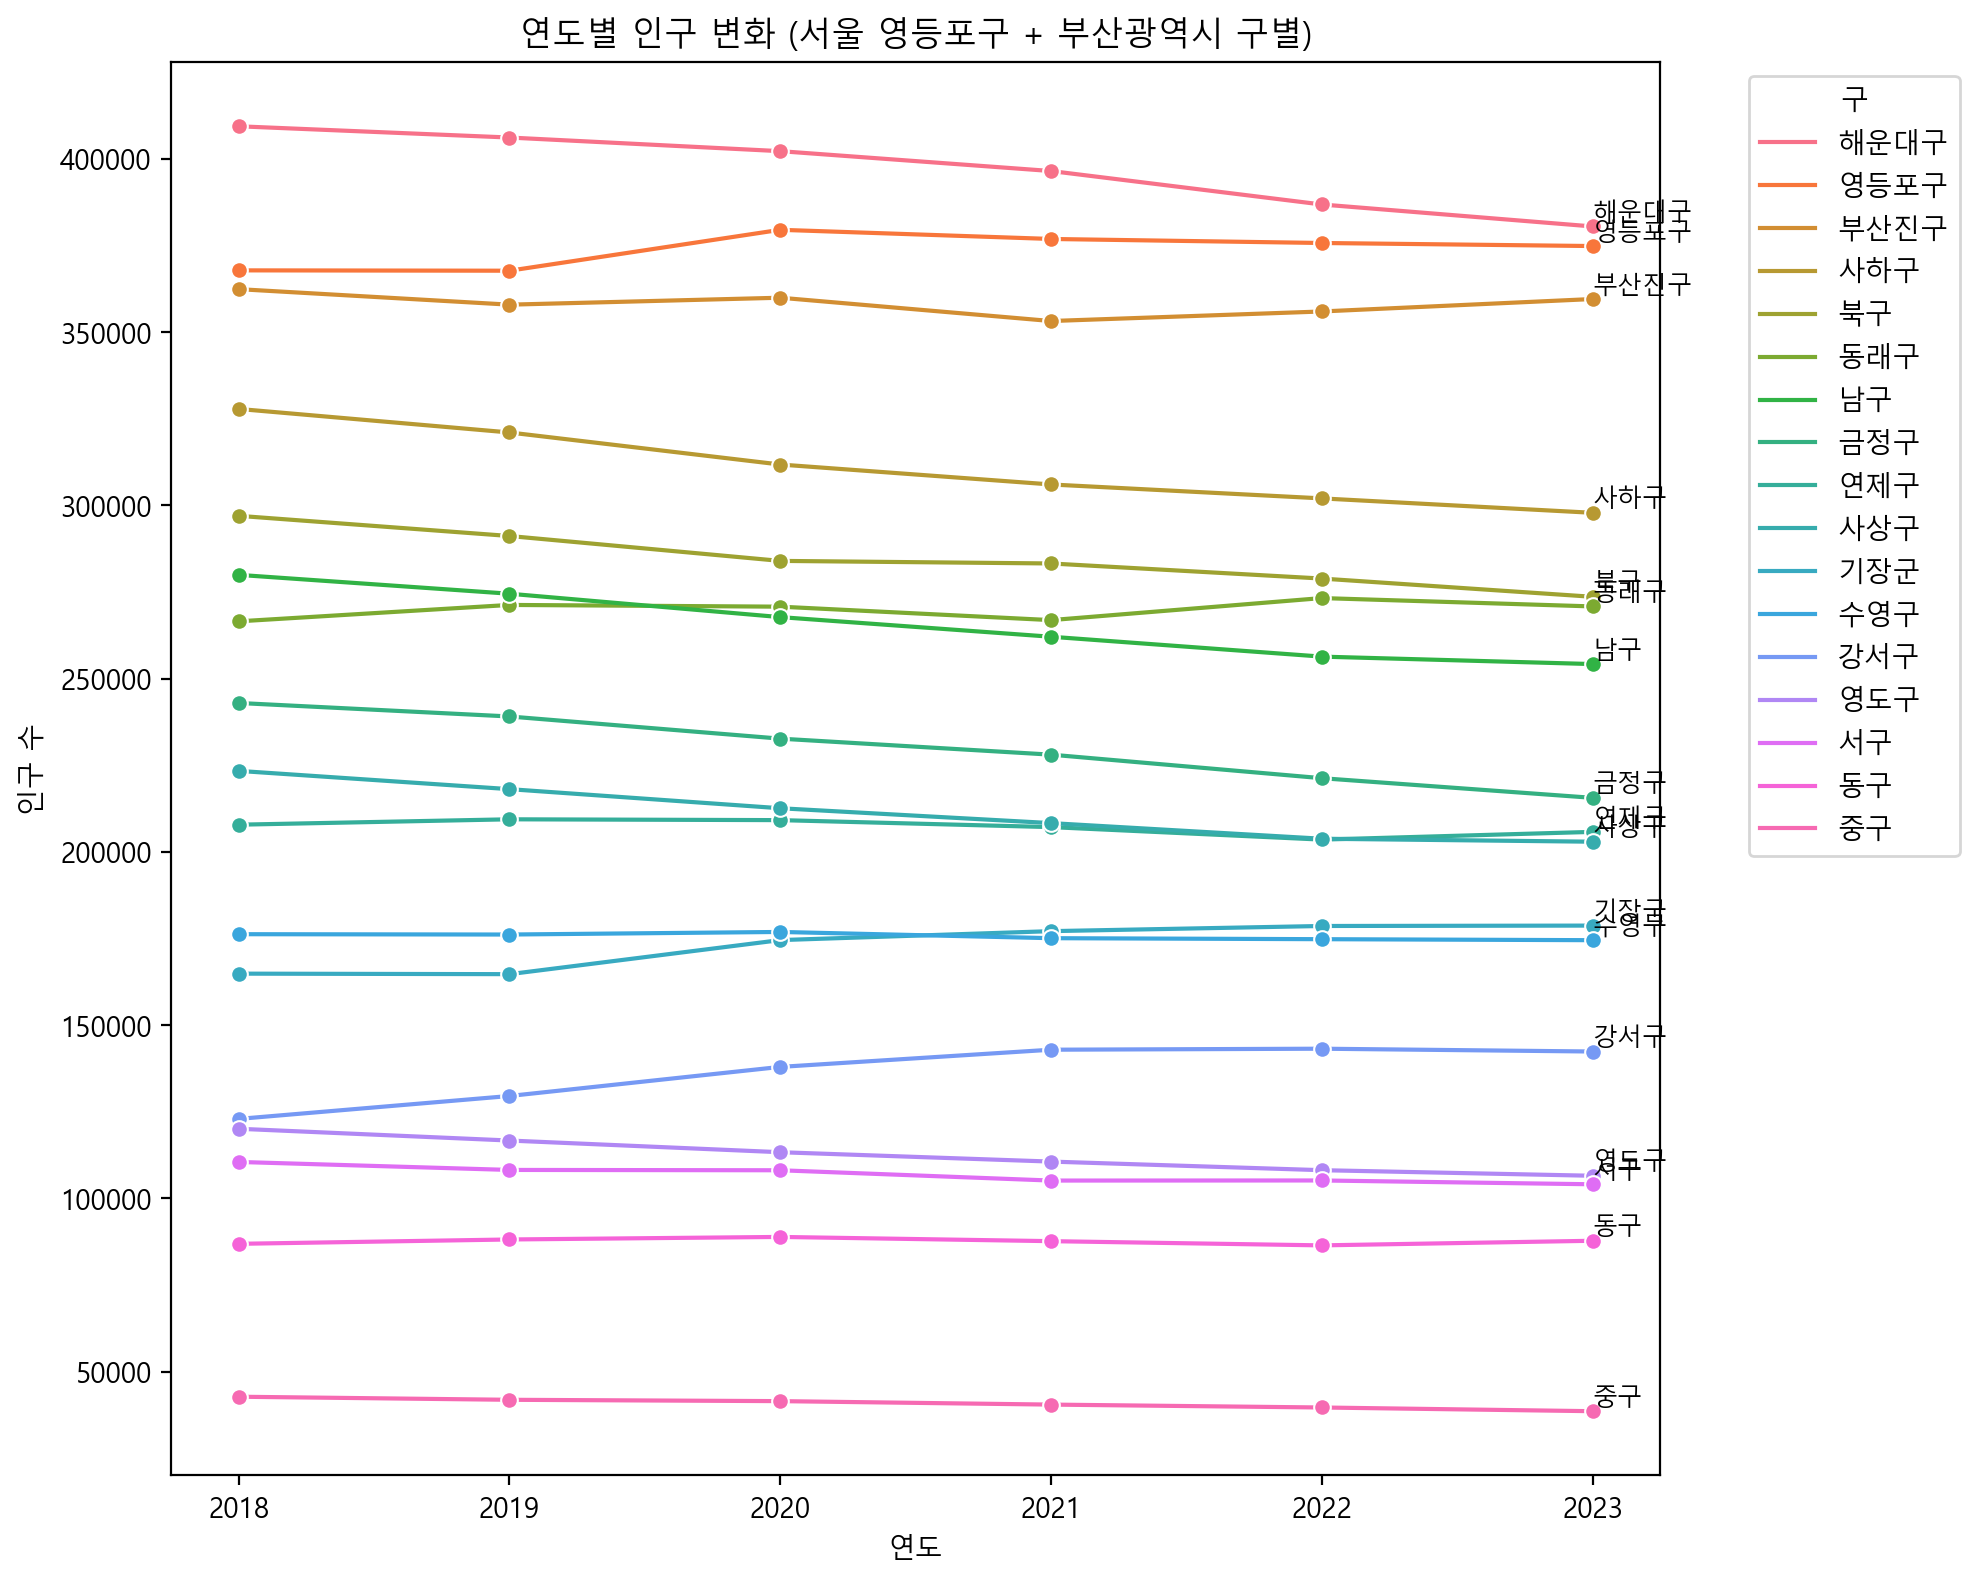

In [15]:
population_long = population_sorted.melt(id_vars='구', 
                                         value_vars=['2018', '2019', '2020', '2021', '2022', '2023'],
                                         var_name='연도', 
                                         value_name='인구수')

# 시각화
plt.figure(figsize=(10, 8))
sns.lineplot(data=population_long, x='연도', y='인구수', hue='구', marker='o')

# 구 이름 출력
latest_data = population_long[population_long['연도'] == '2023']

for i, row in latest_data.iterrows():
    plt.text(row['연도'], row['인구수'], row['구'], fontsize=9, ha='left', va='bottom')

# 그래프 설정
plt.title('연도별 인구 변화 (서울 영등포구 + 부산광역시 구별)')
plt.ylabel('인구 수')
plt.xlabel('연도')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

<br><br>

---

## 04. 주택 데이터 불러오기

In [16]:
## 인구 데이터
housing = pd.read_csv("통계청_주택의_종류별_주택_시군구_20250608215804.csv", encoding="cp949")

print(f"housing shape: {housing.shape}")

housing shape: (153, 8)


<br><br>

---
## 03. 주택 데이터 전처리
- 2018 ~ 2023
- 영등포구의 연도별 주택 수
- 부산시 구별/연도별 주택 수

In [17]:
# cols, head 확인
print(f"cols: {housing.columns}")

housing.head()

cols: Index(['행정구역별(읍면동)', '항목', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')


,행정구역별(읍면동),항목,2018,2019,2020,2021,2022,2023
0,영등포구,주택,99971,101603,107366,110396,112068,114173
1,영등포구,단독주택-계,14644,14378,14276,14054,13623,13593
2,영등포구,단독주택-일반,2310,2133,2107,2058,1783,1778
3,영등포구,단독주택-다가구,9941,9868,9783,9647,9533,9510
4,영등포구,단독주택-영업겸용,2393,2377,2386,2349,2307,2305


In [18]:
# 항목의 unique 값 확인
print(f"항목의 종류: {housing['항목'].unique()}")
housing[housing["행정구역별(읍면동)"] == "영등포구"] 

항목의 종류: ['주택' '단독주택-계' '단독주택-일반' '단독주택-다가구' '단독주택-영업겸용' '아파트' '연립주택' '다세대주택'
 '비주거용 건물 내 주택']


,행정구역별(읍면동),항목,2018,2019,2020,2021,2022,2023
0,영등포구,주택,99971,101603,107366,110396,112068,114173
1,영등포구,단독주택-계,14644,14378,14276,14054,13623,13593
2,영등포구,단독주택-일반,2310,2133,2107,2058,1783,1778
3,영등포구,단독주택-다가구,9941,9868,9783,9647,9533,9510
4,영등포구,단독주택-영업겸용,2393,2377,2386,2349,2307,2305
5,영등포구,아파트,68984,69946,74957,77550,79110,80513
6,영등포구,연립주택,1486,1502,1487,1501,1581,1760
7,영등포구,다세대주택,13674,14595,15474,16134,16644,17198
8,영등포구,비주거용 건물 내 주택,1183,1182,1172,1157,1110,1109


#### 여기서 사용할 항목
- 주택: 전체 비교용
- 단독주택-계
- 연립주택
- 다세대주택
- 비주거용 건물 내 주택: 우선 통계 확인하고 비중이 낮으면 빼기로

<br>

#### 제외할 항목
- 아파트: 얘는 재활용 시설을 보유하고 있을 가능성이 높음
- 단독주택-일반
- 단독주택-다가구
- 단독주택-영업겸용

→ 얘네는 `단독주택-계`에 포함되어 있어서 세부 분석이 필요할 때만 사용하기로~

In [26]:
# "항목" col에서 사용할 것 남기기
use_cols = ['단독주택-계', '연립주택', '다세대주택', '비주거용 건물 내 주택']
housing_filtered = housing[housing['항목'].isin(use_cols)].copy().reset_index(drop=True)

# 자료형을 int로 변환
year_cols = ['2018', '2019', '2020', '2021', '2022', '2023']
housing_filtered[year_cols] = housing_filtered[year_cols].apply(pd.to_numeric)
housing_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  68 non-null     object
 1   항목          68 non-null     object
 2   2018        68 non-null     int64 
 3   2019        68 non-null     int64 
 4   2020        68 non-null     int64 
 5   2021        68 non-null     int64 
 6   2022        68 non-null     int64 
 7   2023        68 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 4.4+ KB


In [28]:
# "행정구역(시군구)별" 칼럼명 변경 >> "구"
housing_filtered = housing_filtered.rename(columns={'행정구역별(읍면동)': '구'})

# shape랑 head 다시 확인
print(f"housing_filtered shape: {housing_filtered.shape}")
housing_filtered.head()

housing_filtered shape: (68, 8)


,구,항목,2018,2019,2020,2021,2022,2023
0,영등포구,단독주택-계,14644,14378,14276,14054,13623,13593
1,영등포구,연립주택,1486,1502,1487,1501,1581,1760
2,영등포구,다세대주택,13674,14595,15474,16134,16644,17198
3,영등포구,비주거용 건물 내 주택,1183,1182,1172,1157,1110,1109
4,중구,단독주택-계,4579,4486,4407,4330,4315,4289


<br><br>

---

## 04. 비아파트 비율도 계산해봄
- 아파트를 제외한 주택이 구 전체에서 어느정도 비율을 차지하는지 확인
- `비아파트비율 = (단독주택-계 + 연립주택 + 다세대주택 + 비주거용 건물 내 주택) / 주택`

In [30]:
# 전체 주택 수 가져오기
housing_total = housing[housing['항목'] == '주택'].copy()
housing_total = housing_total.rename(columns={'행정구역별(읍면동)': '구'})

# 필요한 컬럼만 선택 (구 + 연도)
housing_total_selected = housing_total[['구'] + year_cols].copy()

# 비아파트 주택 수 구별 연도별 합계 계산
housing_non_apt = housing_filtered.groupby('구')[year_cols].sum().reset_index()

# merge
housing_ratio = pd.merge(housing_non_apt, housing_total_selected, on='구', suffixes=('_non_apt', '_total'))

# 비율 계산
for year in year_cols:
    housing_ratio[f'{year}_비아파트비율'] = housing_ratio[f'{year}_non_apt'] / housing_ratio[f'{year}_total']

# 새로운 DF 형태 만들기
# 비아파트 합계 → melt 구조에 맞추기
housing_non_apt_sum = housing_ratio[['구'] + [f'{year}_non_apt' for year in year_cols]].copy()
housing_non_apt_sum = housing_non_apt_sum.rename(columns={f'{year}_non_apt': year for year in year_cols})
housing_non_apt_sum['유형'] = '비아파트합계'

# 비아파트 비율 → melt 구조에 맞추기
housing_non_apt_ratio = housing_ratio[['구'] + [f'{year}_비아파트비율' for year in year_cols]].copy()
housing_non_apt_ratio = housing_non_apt_ratio.rename(columns={f'{year}_비아파트비율': year for year in year_cols})
housing_non_apt_ratio['유형'] = '비아파트비율'

# concat
housing_final = pd.concat([housing_non_apt_sum, housing_non_apt_ratio], axis=0, ignore_index=True)

# 컬럼 순서 정리
housing_sorted = housing_final[['구', '유형'] + year_cols]
housing_sorted.sort_values(by='2023', ascending=False).reset_index(drop=True)

,구,유형,2018,2019,2020,2021,2022,2023
0,부산진구,비아파트합계,49102.000000,47734.000000,46177.000000,45803.000000,44996.000000,44648.000000
1,남구,비아파트합계,45318.000000,44147.000000,43899.000000,42715.000000,41876.000000,41823.000000
2,금정구,비아파트합계,38147.000000,38229.000000,38256.000000,37978.000000,37756.000000,37711.000000
3,사하구,비아파트합계,35896.000000,35579.000000,35660.000000,35222.000000,35139.000000,35087.000000
4,영등포구,비아파트합계,30987.000000,31657.000000,32409.000000,32846.000000,32958.000000,33660.000000
5,수영구,비아파트합계,30991.000000,31088.000000,31295.000000,31599.000000,31659.000000,31802.000000
6,해운대구,비아파트합계,29768.000000,29830.000000,29800.000000,29426.000000,29350.000000,29207.000000
7,동래구,비아파트합계,30503.000000,29884.000000,29222.000000,29336.000000,29185.000000,29137.000000
8,연제구,비아파트합계,23674.000000,23706.000000,23885.000000,24093.000000,23945.000000,23988.000000
9,서구,비아파트합계,23533.000000,23259.000000,22966.000000,22336.000000,22209.000000,22073.000000


<br><br>

---

## 05. 주택 수/비율 시각화

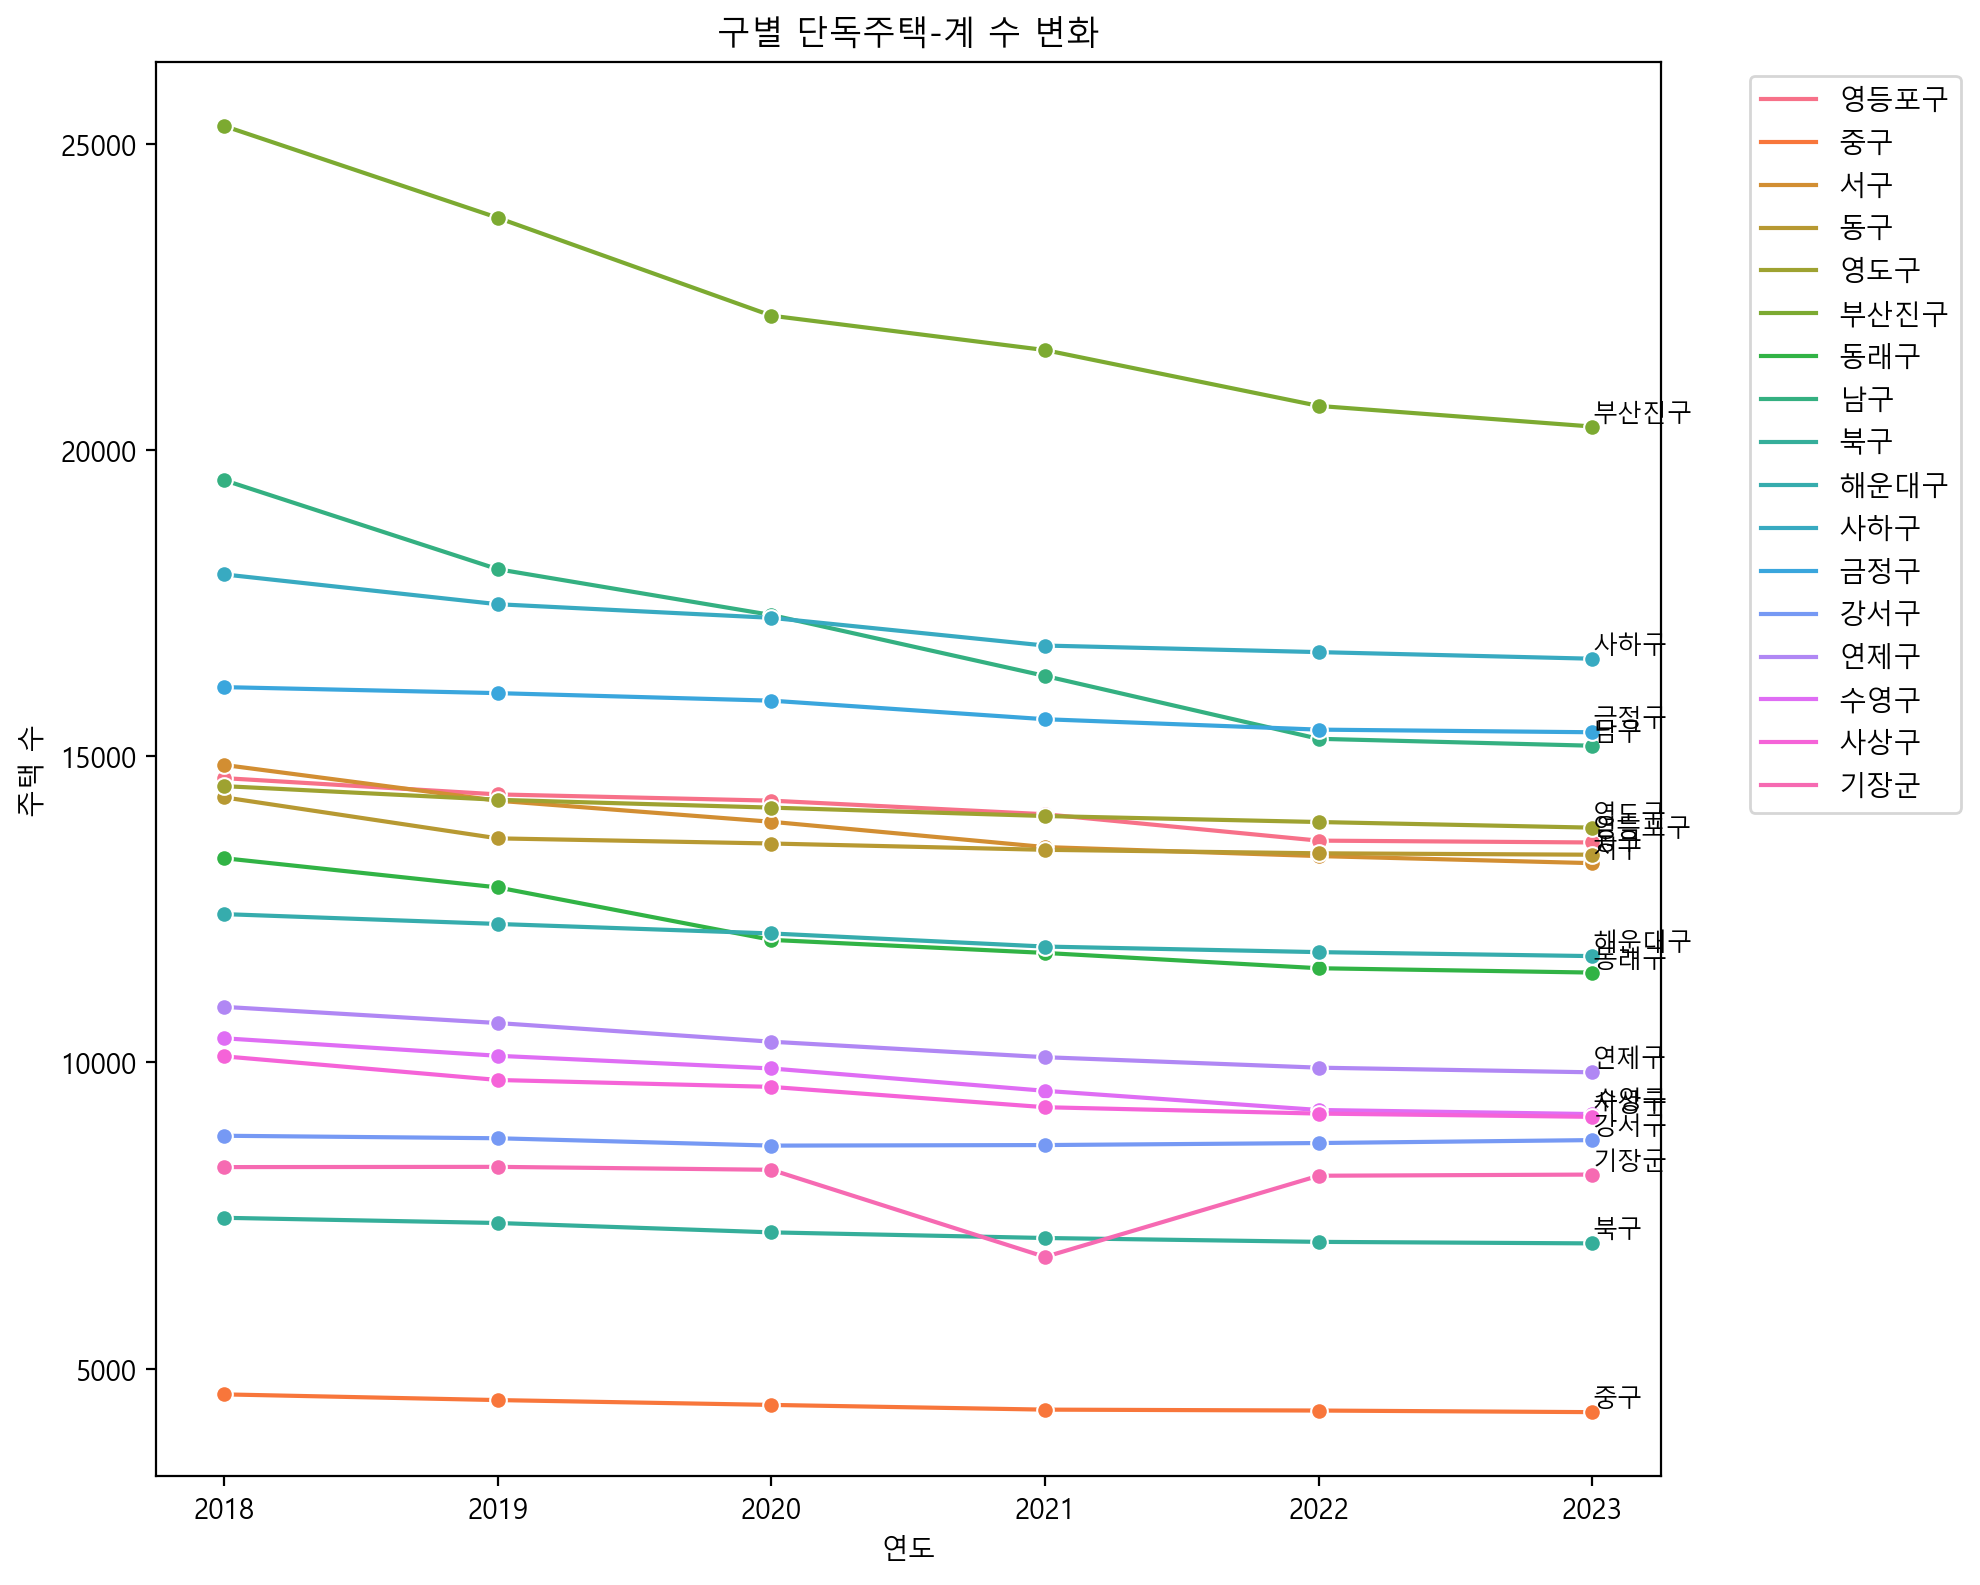

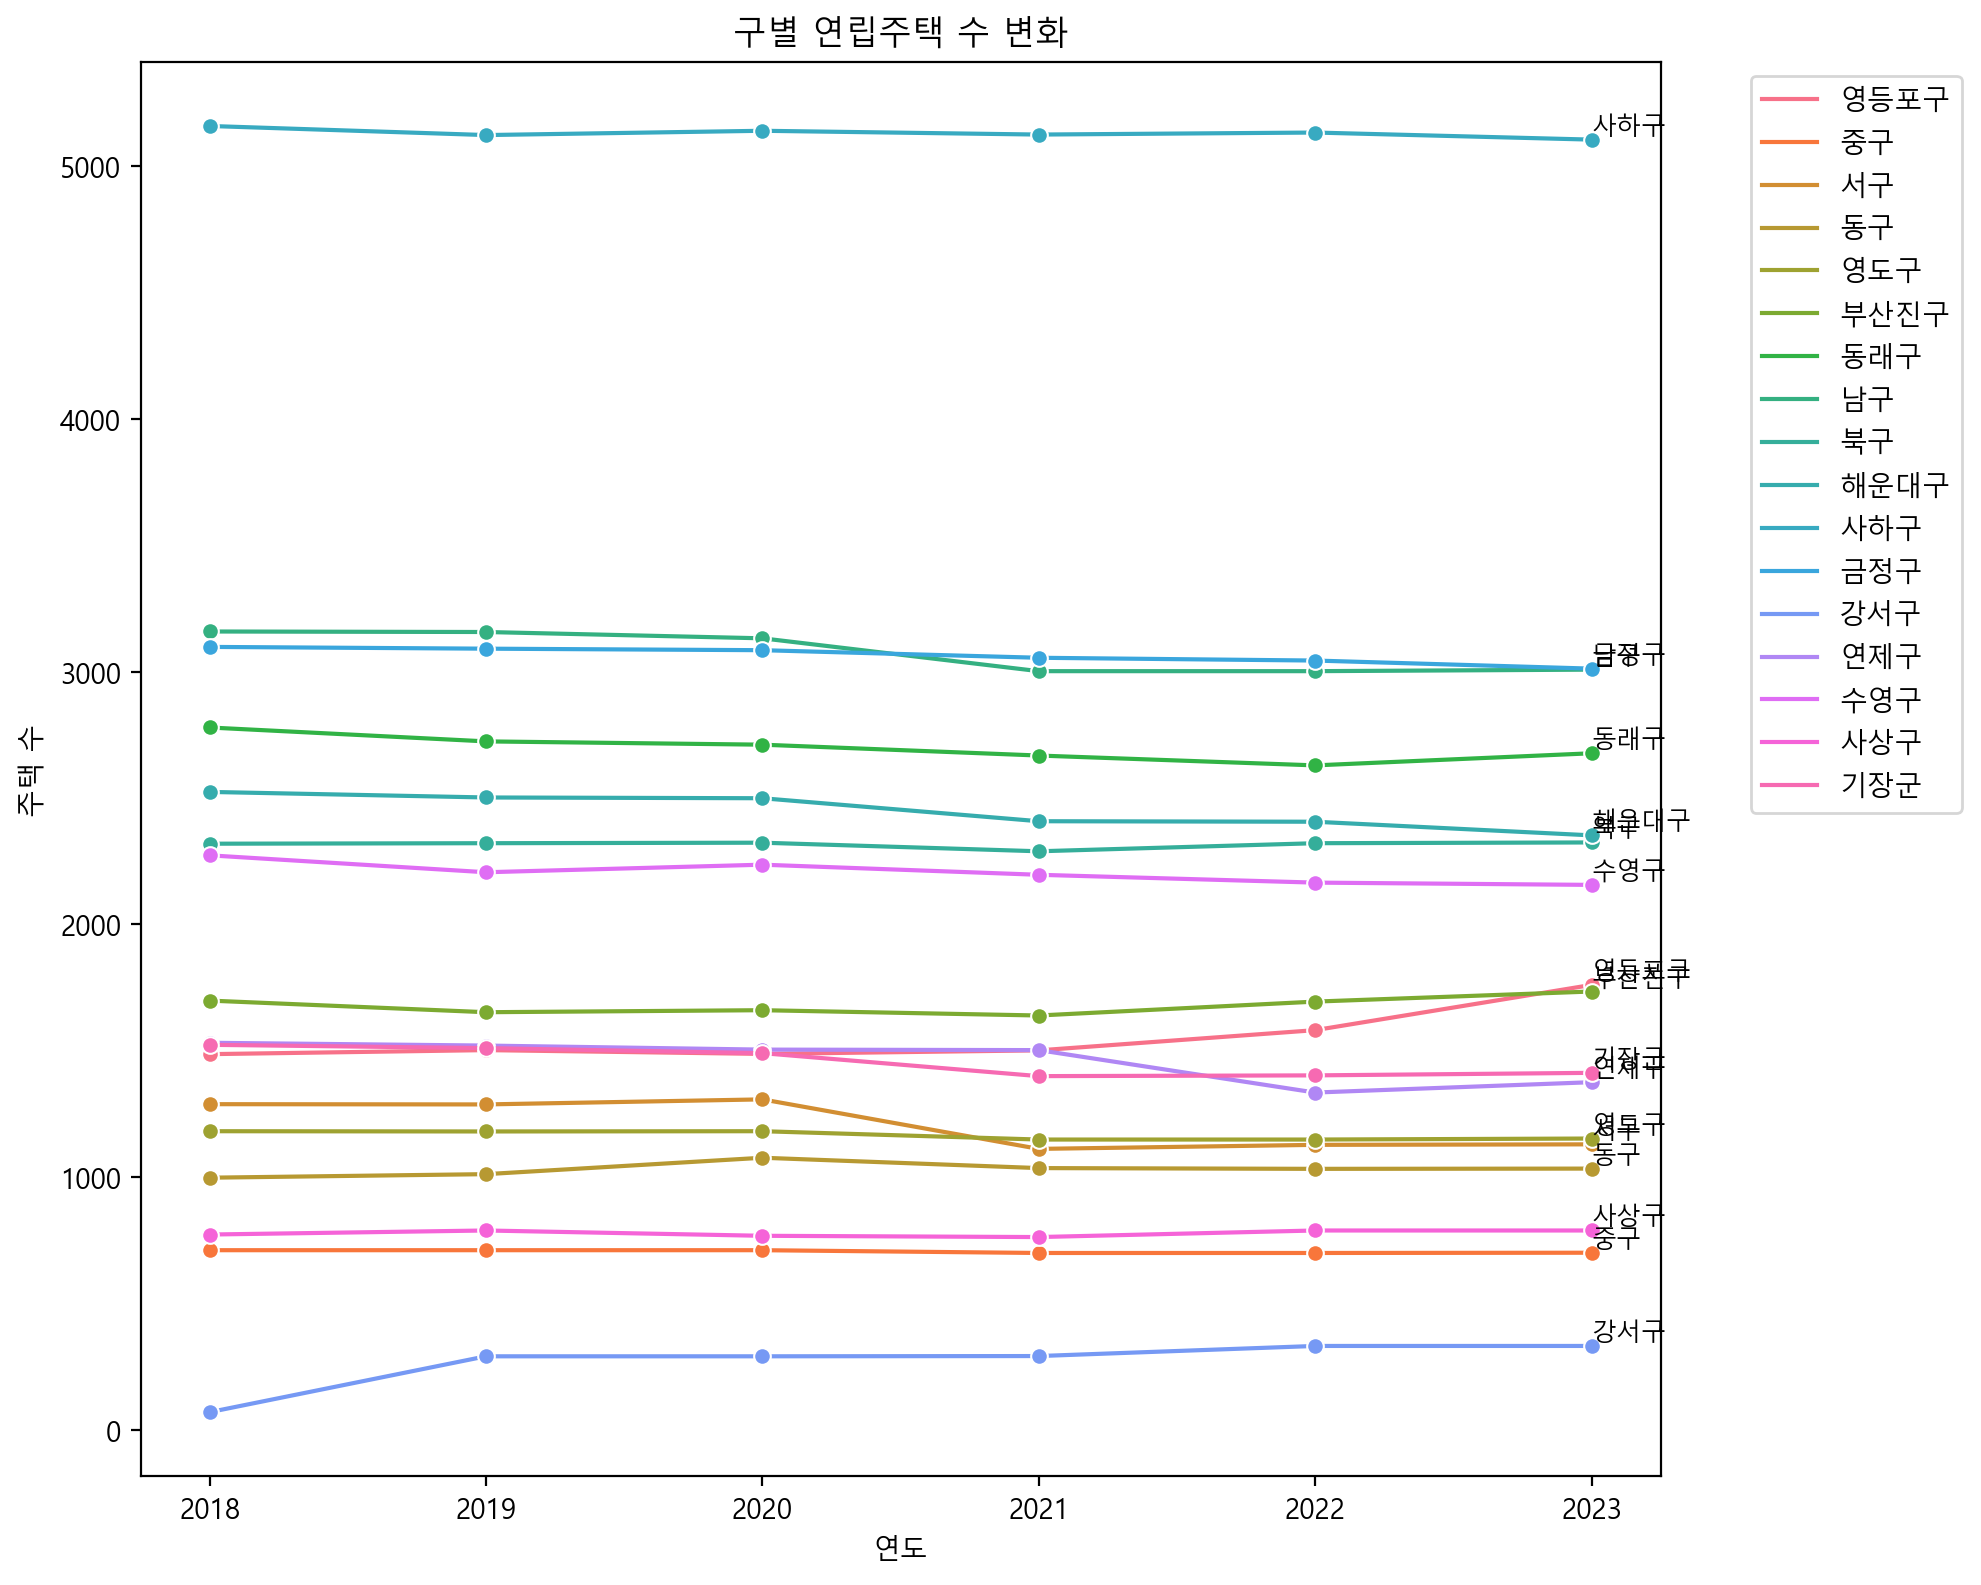

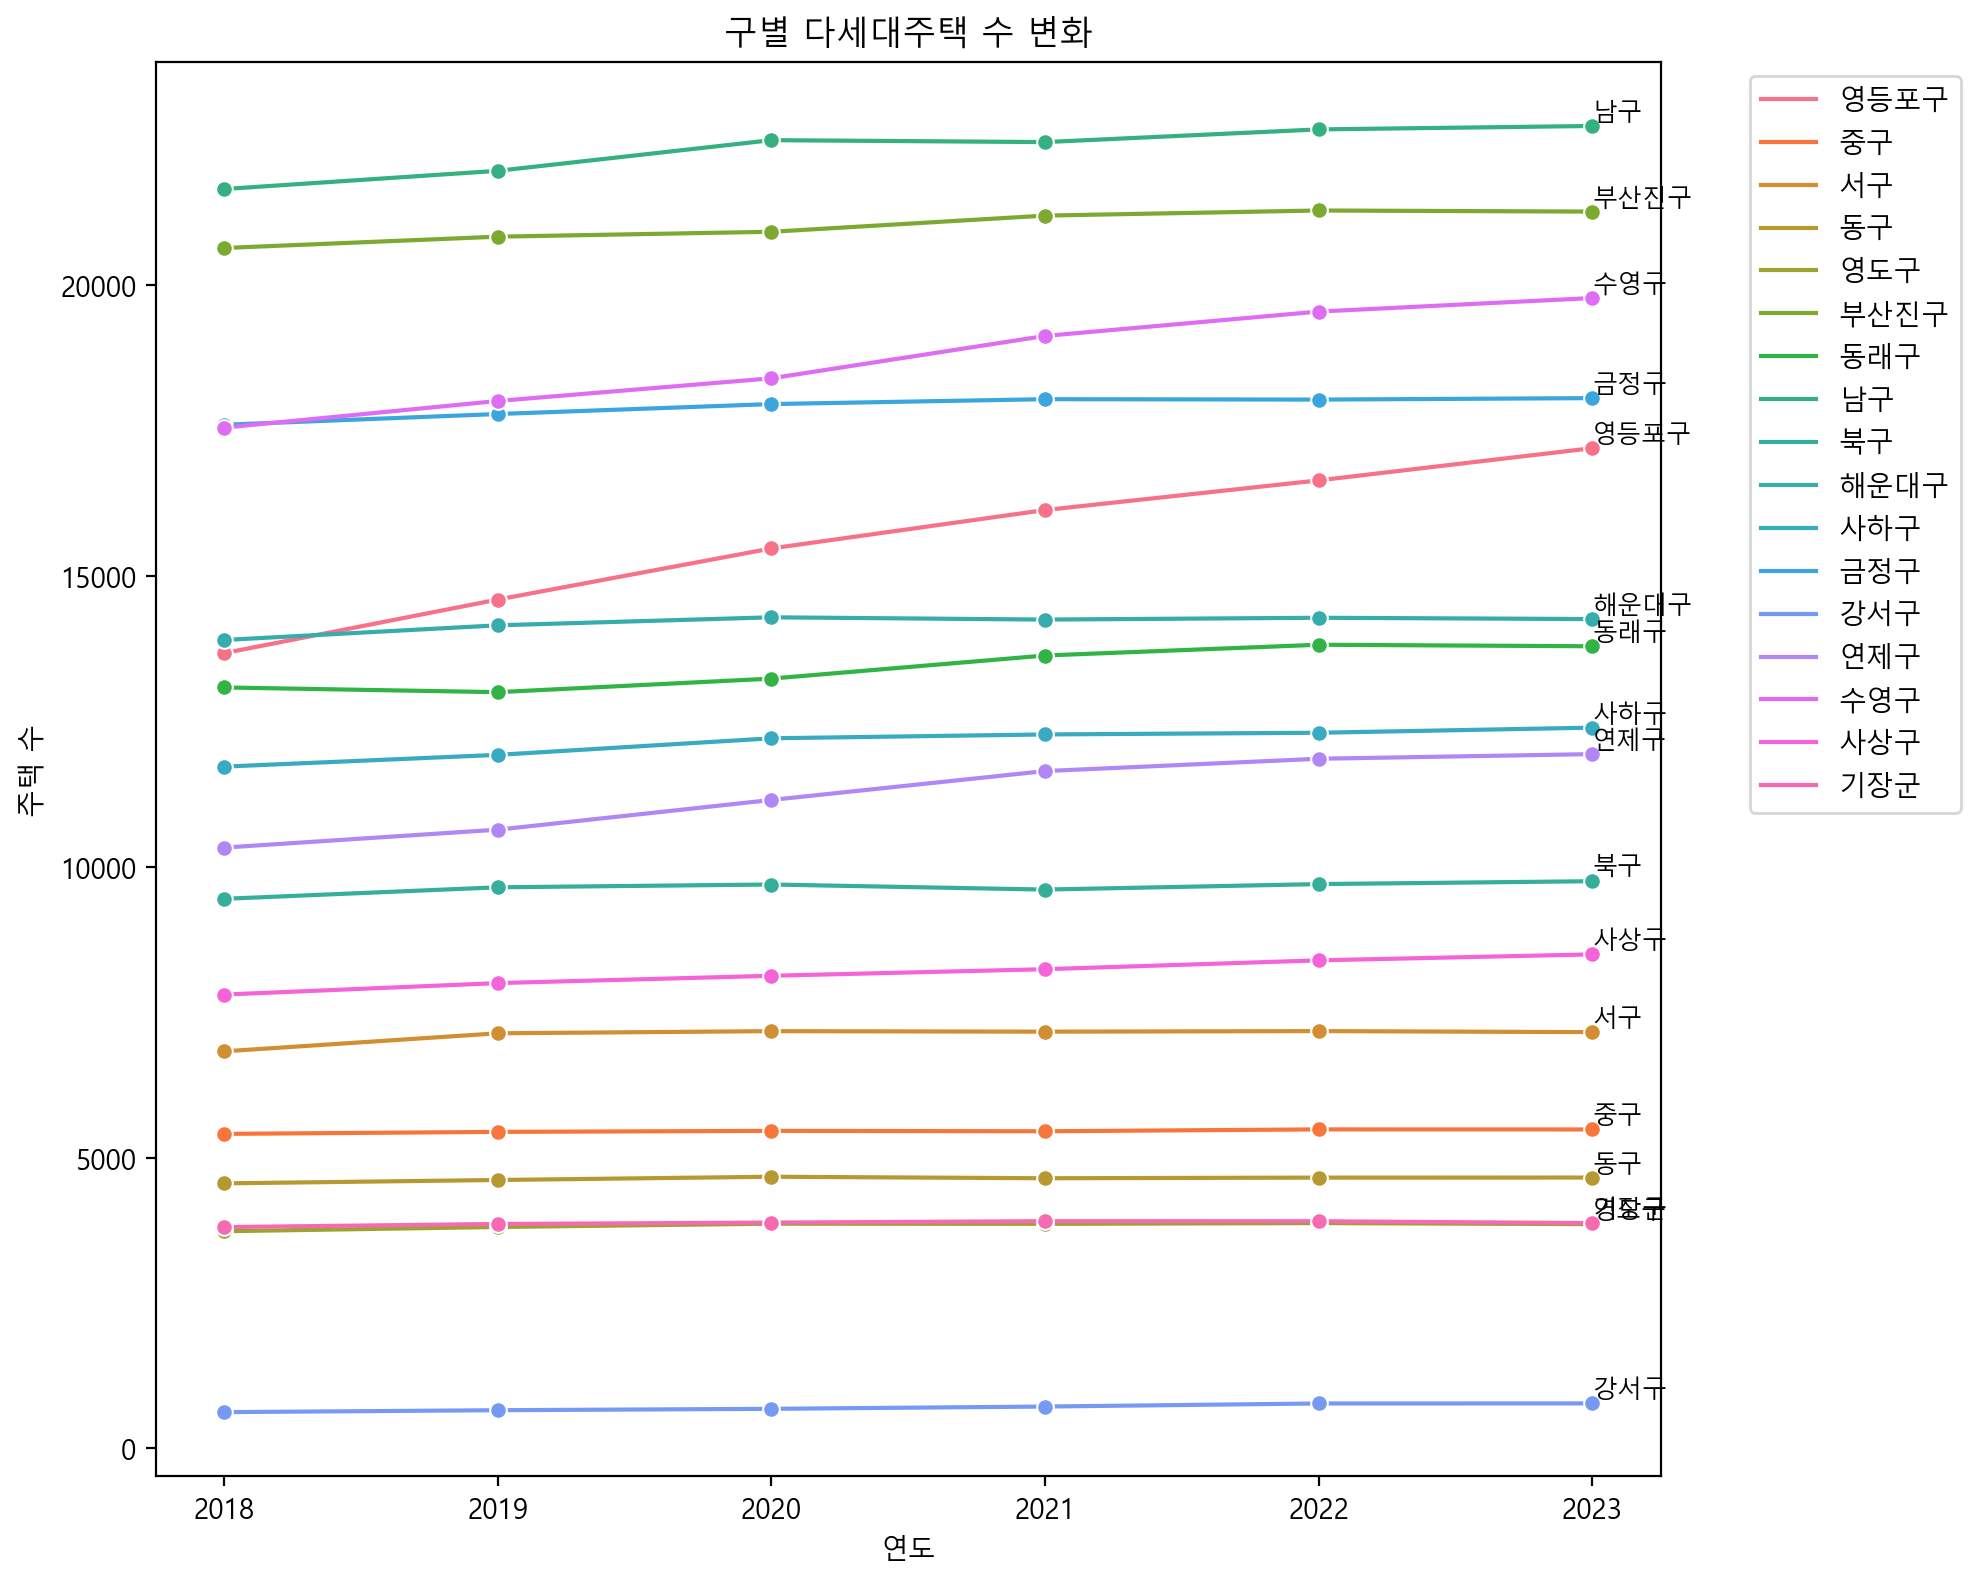

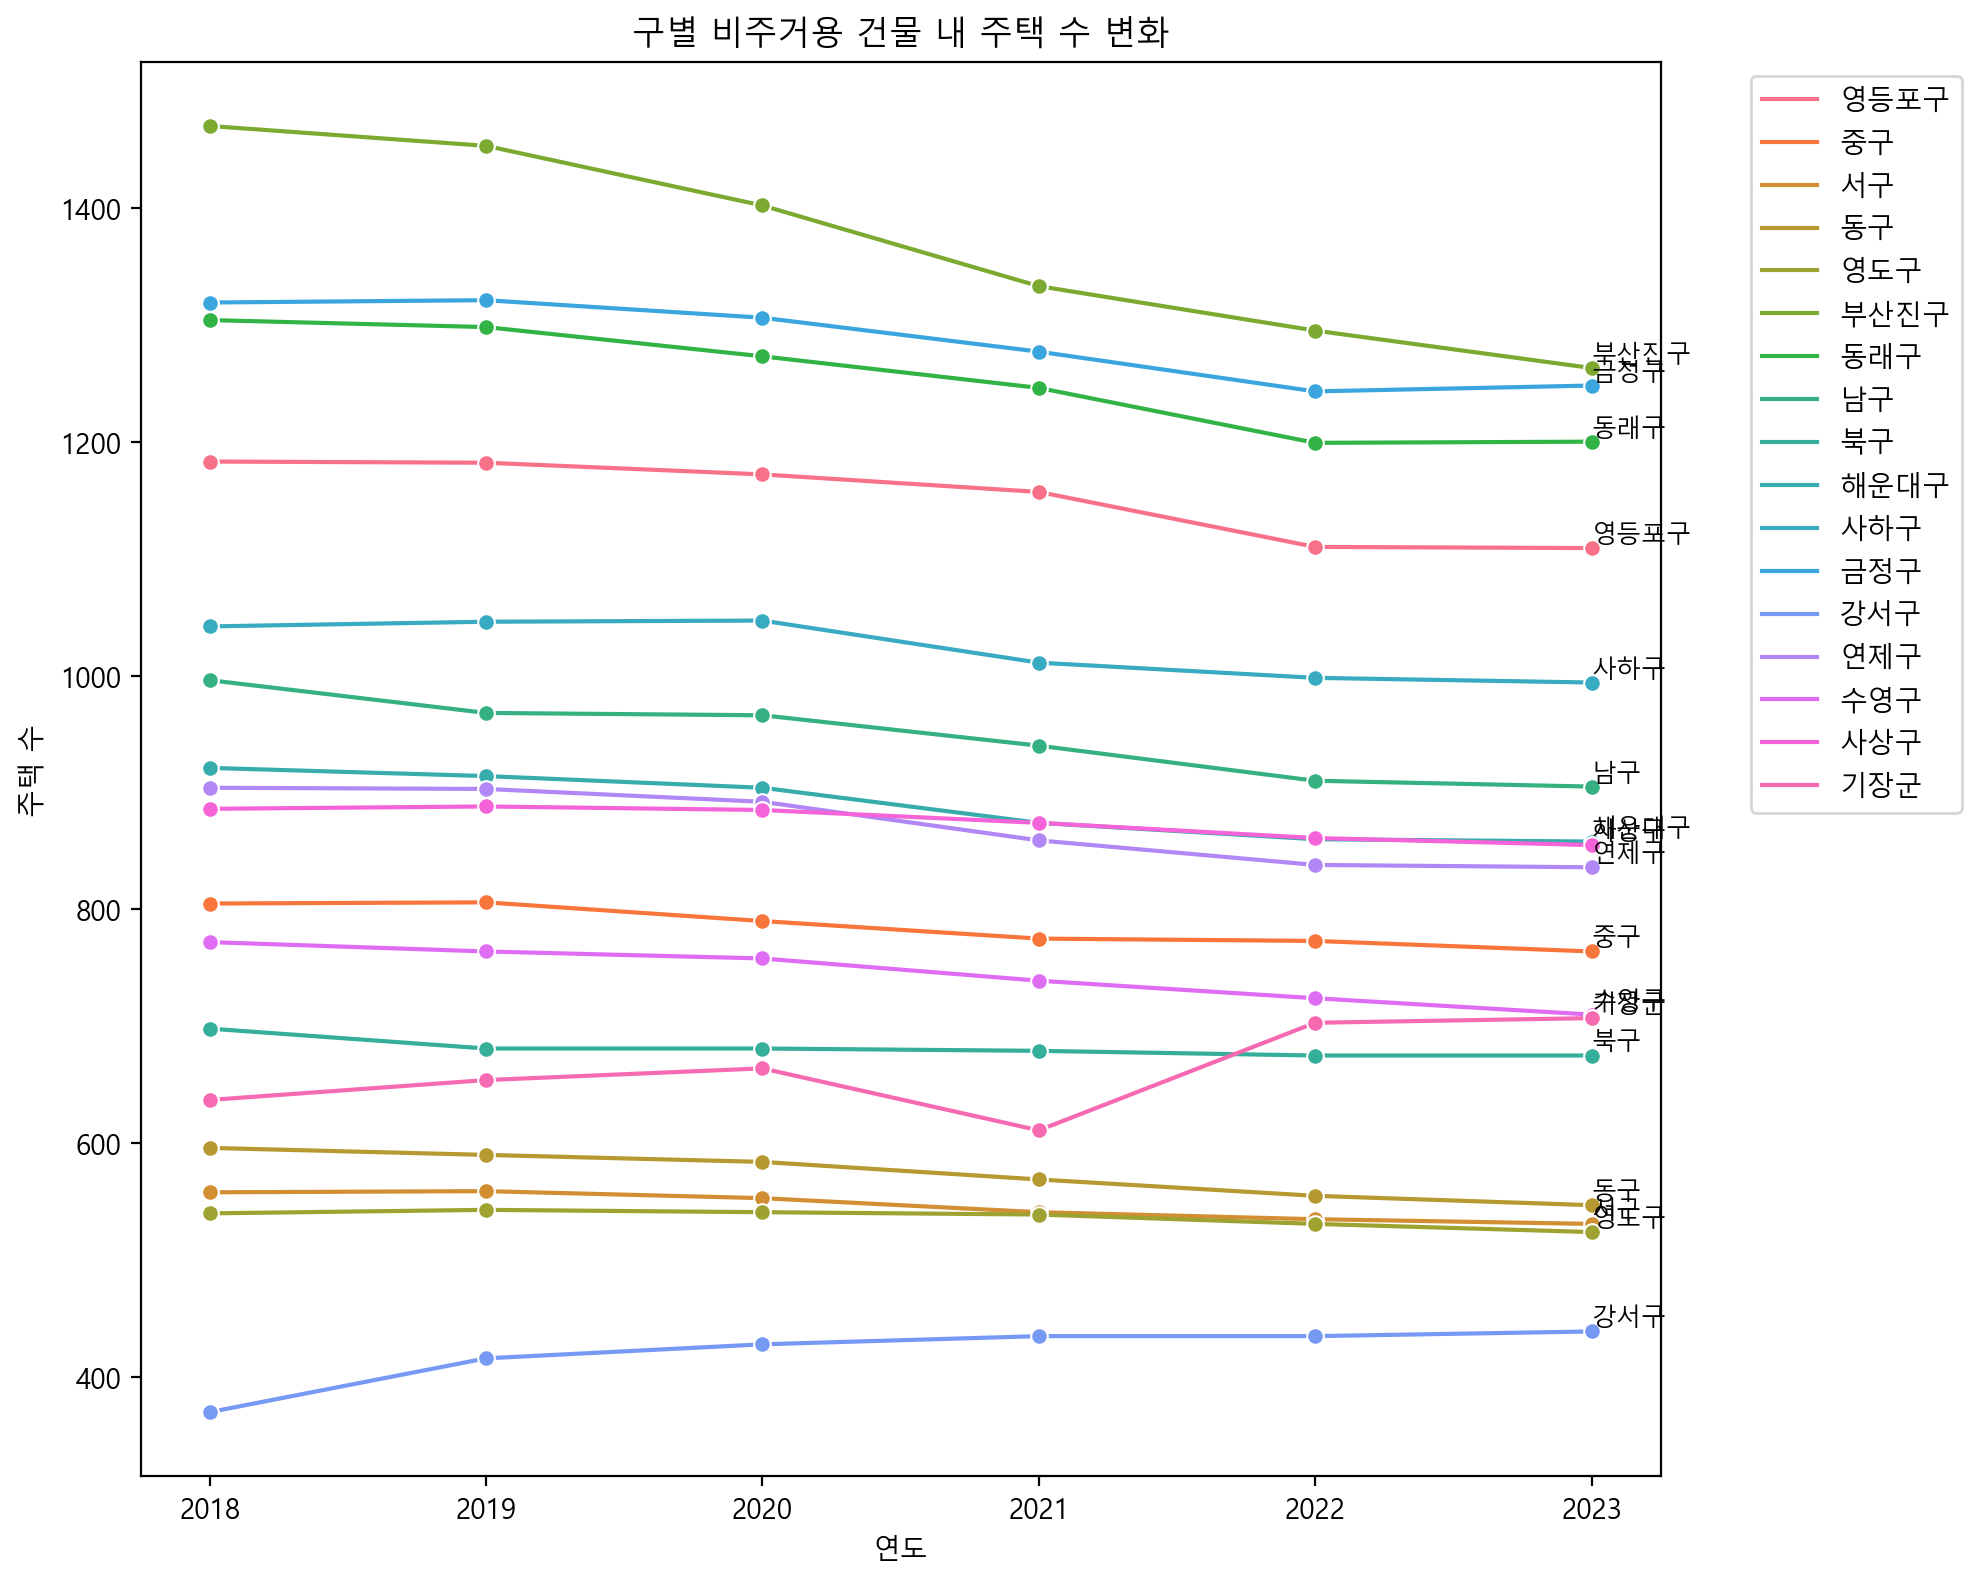

In [31]:
housing_long = housing_filtered.melt(id_vars=['구', '항목'],
                                     value_vars=year_cols,
                                     var_name='연도',
                                     value_name='주택수')

# 주택 유형(항목) 리스트 추출
housing_types = housing_long['항목'].unique()

# 반복해서 각 유형별로 plot 출력
for h_type in housing_types:
    plt.figure(figsize=(10, 8))
    
    # 해당 유형만 필터링
    df_plot = housing_long[housing_long['항목'] == h_type]

    # plot
    sns.lineplot(data=df_plot, x='연도', y='주택수', hue='구', marker='o')

    # 구 이름 출력 (2023년 기준)
    latest_data = df_plot[df_plot['연도'] == '2023']
    for i, row in latest_data.iterrows():
        plt.text(row['연도'], row['주택수'], row['구'], fontsize=9, ha='left', va='bottom')
  
    plt.title(f'구별 {h_type} 수 변화')
    plt.ylabel('주택 수')
    plt.xlabel('연도')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

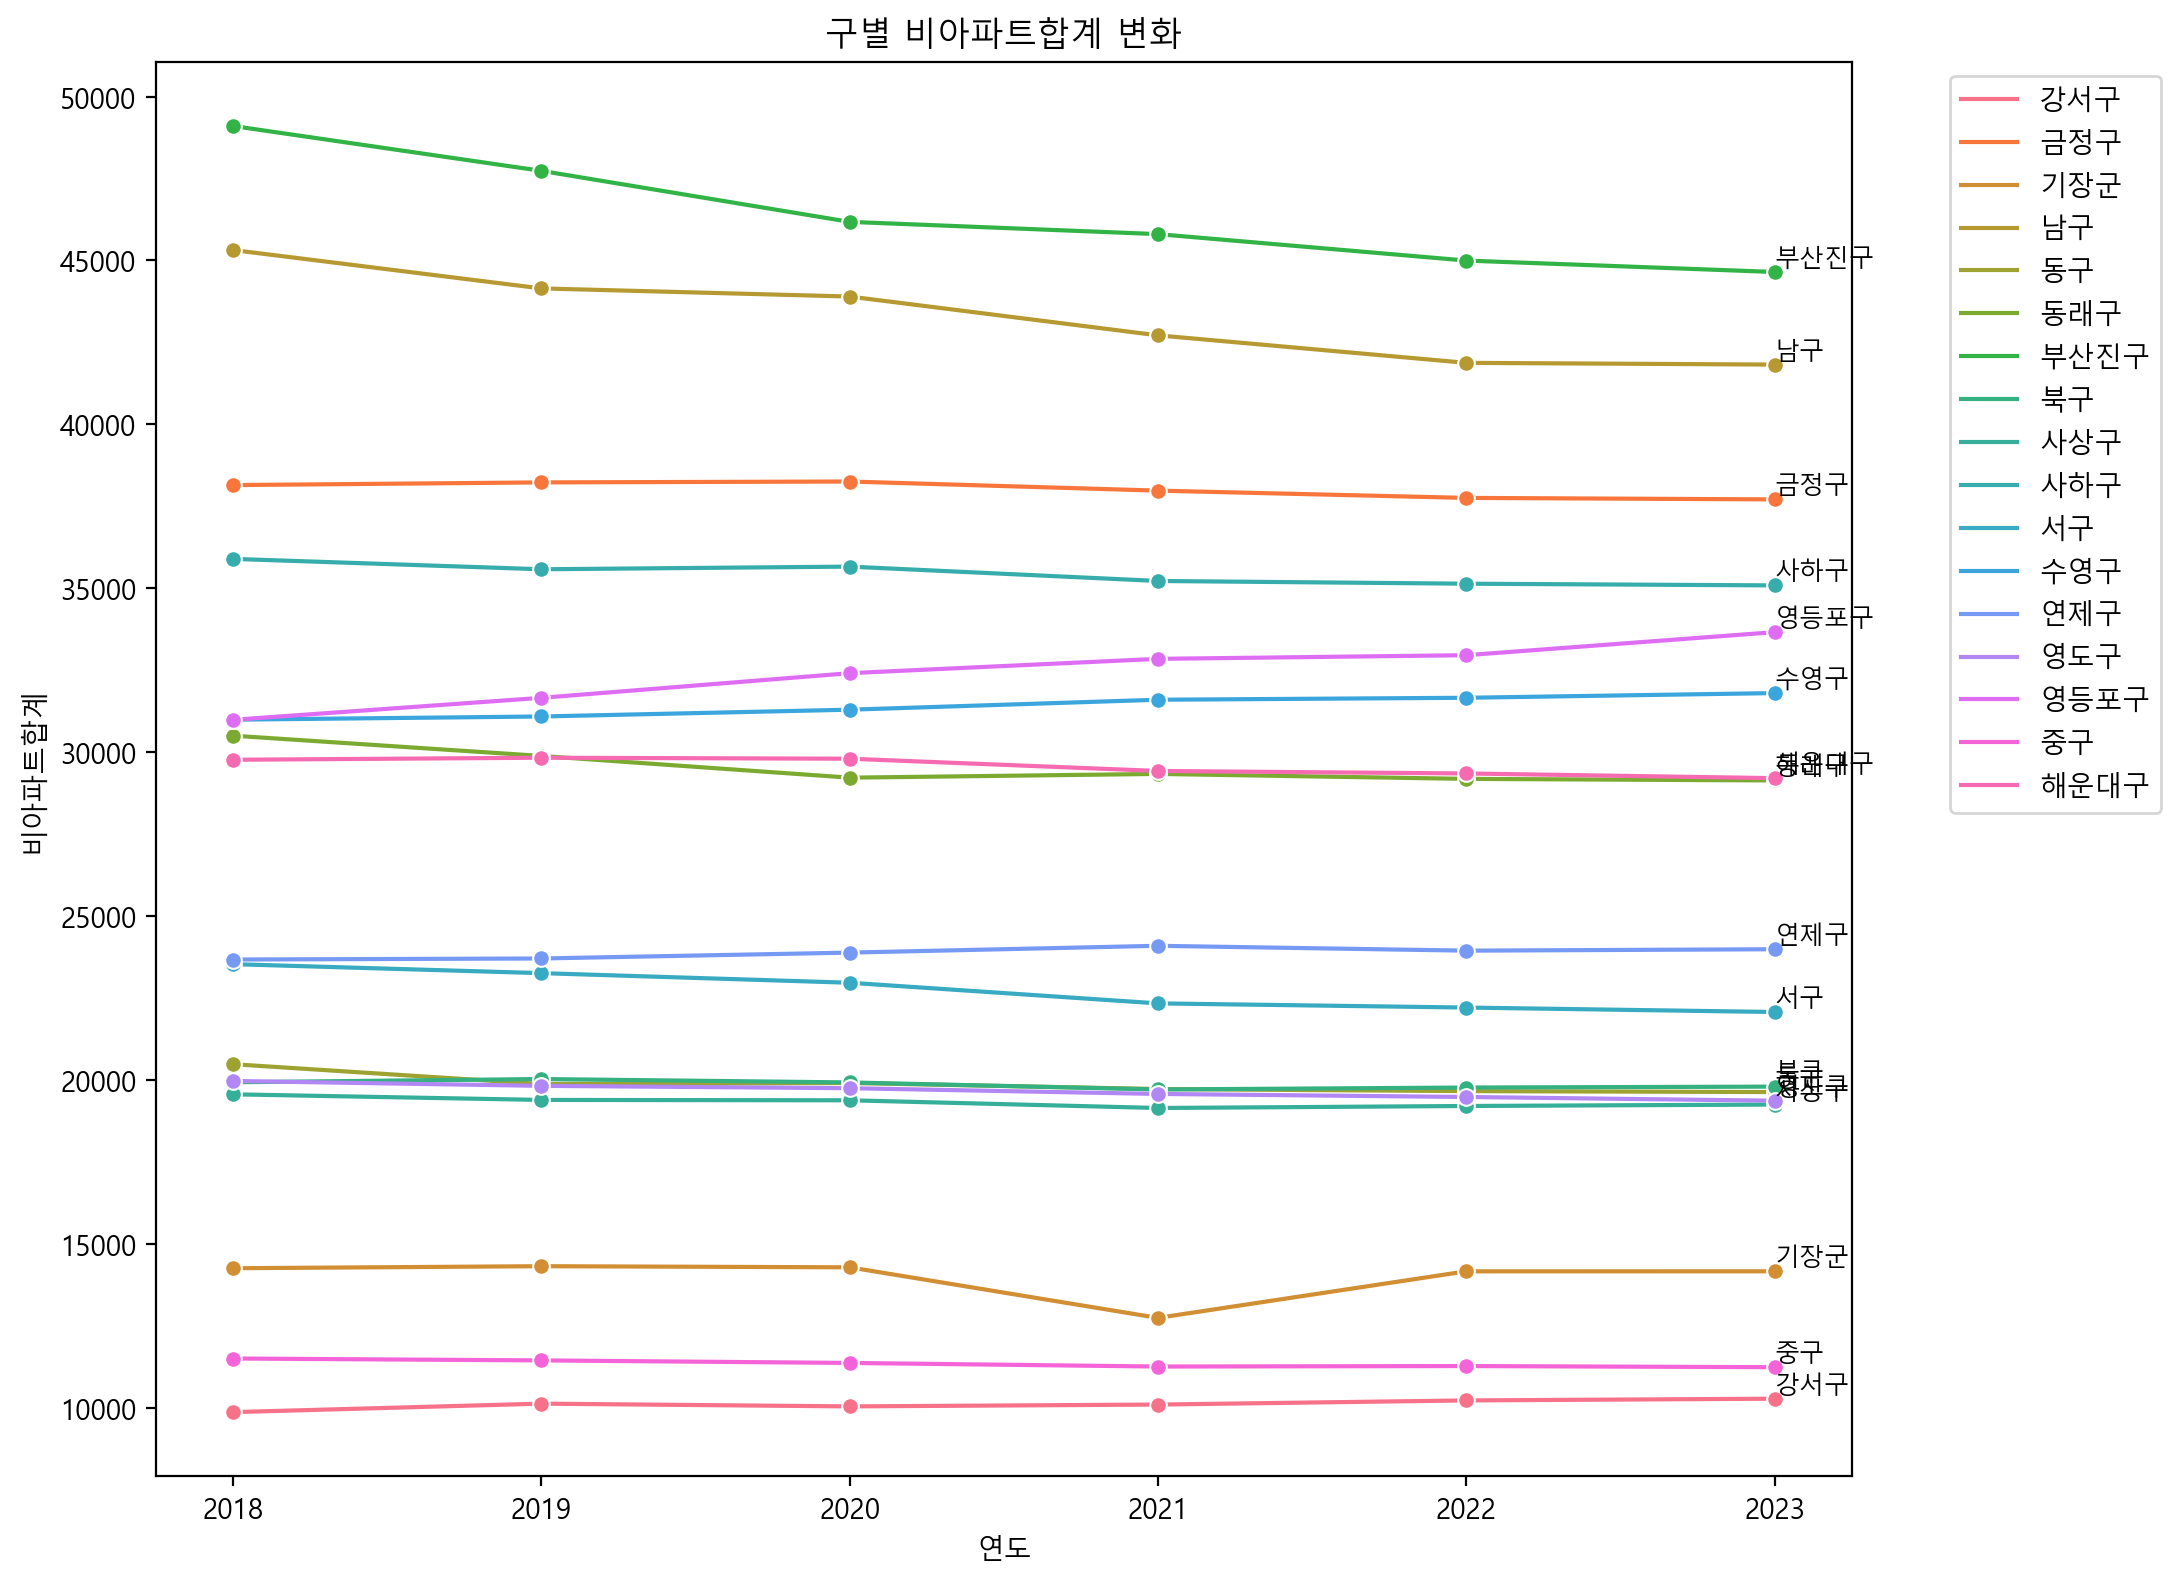

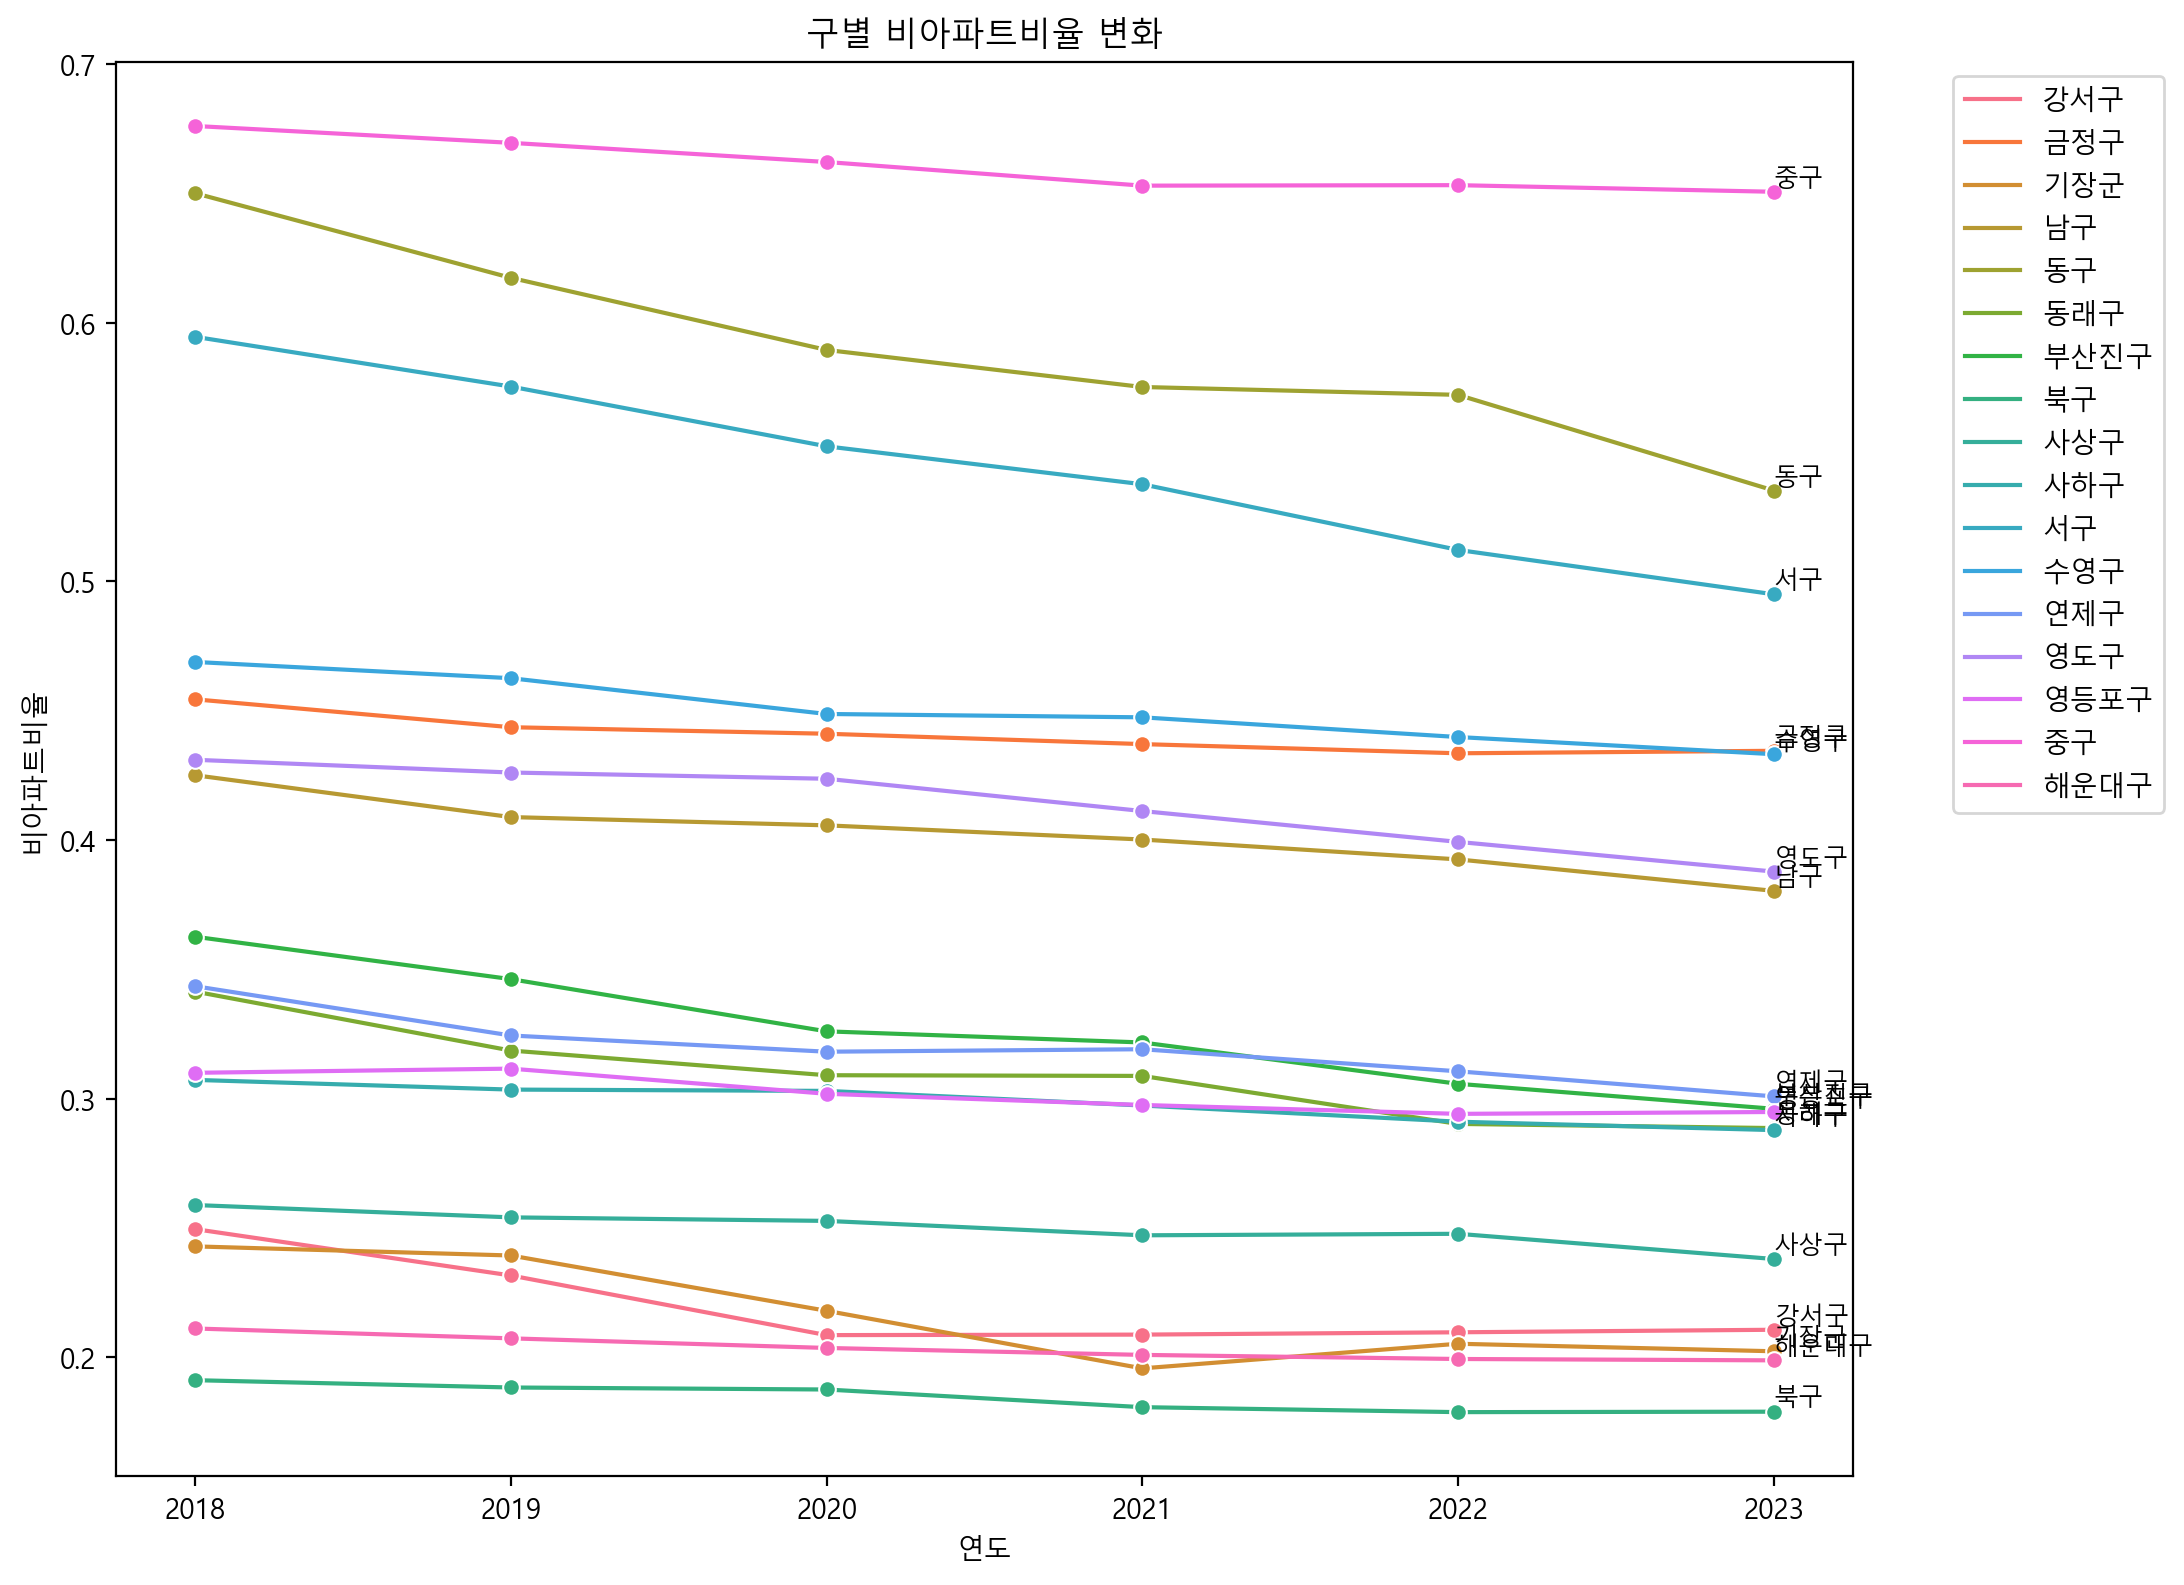

In [33]:
# melt (long-form으로 변환)
housing_plot_long = housing_sorted.melt(id_vars=['구', '유형'],
                                        value_vars=year_cols,
                                        var_name='연도',
                                        value_name='값')

for utype in housing_plot_long['유형'].unique():
    plt.figure(figsize=(11, 8))
    df_plot_sub = housing_plot_long[housing_plot_long['유형'] == utype]
    
    sns.lineplot(data=df_plot_sub, x='연도', y='값', hue='구', marker='o')
    
    # 구 이름 출력 (2023년 기준 값에 이름 표시)
    latest_data = df_plot_sub[df_plot_sub['연도'] == '2023']
    for i, row in latest_data.iterrows():
        plt.text(row['연도'], row['값'], row['구'], fontsize=9, ha='left', va='bottom')
    
    plt.title(f'구별 {utype} 변화')
    plt.ylabel(f'{utype}')
    plt.xlabel('연도')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

<br><br>

---

## 06. 폐기물 데이터 불러오기

In [34]:
### 폐기물 데이터
ydp_waste = pd.read_csv("폐기물/통계청_영등포구_쓰레기수거_현황_20250608233308.csv", encoding="cp949")
busan_waste = pd.read_csv("폐기물/통계청_부산_쓰레기_수거_20250609023649.csv", encoding="cp949")

print(f"ydp_waste shape: {ydp_waste.shape}")
print(f"busan_waste shape: {busan_waste.shape}")

ydp_waste shape: (8, 10)
busan_waste shape: (102, 9)


<br><br>

---
## 05. 폐기물 데이터 전처리
- 영등포구 데이터에서 사용할 칼럼 & info
    - 행정구역 > 면적 (㎢) → 면적
    - 배출량(C) (톤/일) → 하루 평균 쓰레기 배출량
    - 처리량(D) (톤/일) → 하루 평균 쓰레기 처리량
    - 매립+소각 → 일반쓰레기
    - 재활용 → 재활용량

<br>

- 부산시 구별/연도별 폐기물 통계
    - 배출량(C) (톤/일) → 하루 평균 쓰레기 배출량
    - 처리량(D) (톤/일) → 하루 평균 쓰레기 처리량
    - 매립+소각 → 일반쓰레기
    - 재활용 → 재활용량

<br>

### a. 서울시 영등포구

In [35]:
# cols, head 확인
print(f"cols: {ydp_waste.columns}")

ydp_waste

cols: Index(['자치구별(1)', '자치구별(2)', '구분별(1)', '구분별(2)', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


,자치구별(1),자치구별(2),구분별(1),구분별(2),2018,2019,2020,2021,2022,2023
0,합계,영등포구,행정구역(A),면적 (㎢),24.55,24.55,24.55,24.55,24.55,24.55
1,합계,영등포구,행정구역(A),인구 (명),403600,400986.00,407367.00,400908.00,398085.00,397800.00
2,합계,영등포구,배출량(C) (톤/일),소계,2322.4,2540.70,2140.40,1911.40,2248.90,1540.50
3,합계,영등포구,처리량(D) (톤/일),소계,2322.4,2540.70,2140.40,1911.40,2248.90,1540.50
4,합계,영등포구,처리방법,매립,23.7,62.00,34.50,57.10,36.10,29.50
5,합계,영등포구,처리방법,소각,107.1,100.30,122.70,89.20,109.10,112.30
6,합계,영등포구,처리방법,재활용,2191.6,2374.60,1978.80,1758.60,2086.90,1395.60
7,합계,영등포구,처리방법,기타,-,3.80,4.40,6.40,16.80,3.10


In [36]:
# '자치구별(1)' col 삭제
ydp_waste_drop = ydp_waste.drop(columns=['자치구별(1)']).copy()

### '구분' 컬럼 생성
- '행정구역(A)' → '구분별(2)' 값 사용 → '면적 (㎢)', '인구 (명)' 생성
- '배출량(C) (톤/일)' → '배출량 (톤/일)'
- '처리량(D) (톤/일)'은 배출량 데이터와 같으므로 행 삭제
- '처리방법' → '구분별(2)' 값 사용 → '매립', '소각', '재활용', '기타'

In [37]:
ydp_waste_drop['구분'] = ydp_waste_drop.apply(
    lambda row:
    row['구분별(2)'] if row['구분별(1)'] in ['행정구역(A)', '처리방법']
    else '배출량 (톤/일)' if row['구분별(1)'] == '배출량(C) (톤/일)'
    else '처리량 (톤/일)' if row['구분별(1)'] == '처리량(D) (톤/일)'
    else row['구분별(1)'],
    axis=1
)

# 이제 사용하지 않을 '구분별(1)', '구분별(2)' 삭제
ydp_waste_rename = ydp_waste_drop.drop(columns=['구분별(1)', '구분별(2)'])
ydp_waste_rename.head(3)

,자치구별(2),2018,2019,2020,2021,2022,2023,구분
0,영등포구,24.55,24.55,24.55,24.55,24.55,24.55,면적 (㎢)
1,영등포구,403600,400986.00,407367.00,400908.00,398085.00,397800.00,인구 (명)
2,영등포구,2322.4,2540.70,2140.40,1911.40,2248.90,1540.50,배출량 (톤/일)


In [38]:
# "자치구별(2)" 칼럼명 변경 >> "구"
ydp_waste_rename = ydp_waste_rename.rename(columns={'자치구별(2)': '구'})

# 컬럼 순서 정리 (원하는 경우)
ydp_waste_rename = ydp_waste_rename[['구', '구분', '2018', '2019', '2020', '2021', '2022', '2023']]

# "구분"에서 '인구 (명)', '기타', '처리량 (톤/일)' 제거
ydp_filtered = ydp_waste_rename[~ydp_waste_rename['구분'].isin(['인구 (명)', '처리량 (톤/일)', '기타'])].copy()
ydp_filtered

,구,구분,2018,2019,2020,2021,2022,2023
0,영등포구,면적 (㎢),24.55,24.55,24.55,24.55,24.55,24.55
2,영등포구,배출량 (톤/일),2322.4,2540.70,2140.40,1911.40,2248.90,1540.50
4,영등포구,매립,23.7,62.00,34.50,57.10,36.10,29.50
5,영등포구,소각,107.1,100.30,122.70,89.20,109.10,112.30
6,영등포구,재활용,2191.6,2374.60,1978.80,1758.60,2086.90,1395.60


<br>

### b. 부산광역시

In [39]:
# cols, head 확인
print(f"cols: {busan_waste.columns}")
busan_waste.head(15)

cols: Index(['구군별(1)', '수거현황별(1)', '수거현황별(2)', '수거현황별(3)', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


,구군별(1),수거현황별(1),수거현황별(2),수거현황별(3),2018,2019,2020,2021,2022
0,합계,행정구역,면적 (㎢),소계,769.94,770.07,770.07,770.17,771.33
1,합계,배출량(C) (톤/일),소계,소계,3337.2,3326.0,3990.4,3252.5,3263.9
2,합계,처리방법,생활계 폐기물,매립,98.4,121.2,155.7,436.8,304.5
3,합계,처리방법,생활계 폐기물,소각,410.9,510.8,565.6,707.4,385.1
4,합계,처리방법,생활계 폐기물,재활용,2827.9,2694.0,3208.9,2081.3,2490.6
5,합계,처리방법,생활계 폐기물,기타,-,-,60.3,26.9,83.7
6,중구,행정구역,면적 (㎢),소계,2.83,2.83,2.83,2.83,3.01
7,중구,배출량(C) (톤/일),소계,소계,81.5,81.3,81.5,67.7,78.6
8,중구,처리방법,생활계 폐기물,매립,9.1,10.5,7.1,15.6,7.4
9,중구,처리방법,생활계 폐기물,소각,14.7,16.9,20.2,20.9,17.4


### '구분' 컬럼 생성
- 행정구역 → 수거현황별(2) 값 (면적, 인구)
- 배출량(C) (톤/일) → '배출량 (톤/일)'
- 처리량(D) (톤/일) → '처리량 (톤/일)'
- 처리방법 → 수거현황별(3) 값 (매립, 소각, 재활용, 기타)

In [40]:
busan_waste_rename = busan_waste.copy()

# '구분' 컬럼 생성
busan_waste_rename['구분'] = busan_waste_rename.apply(
    lambda row:
    row['수거현황별(2)'] if row['수거현황별(1)'] == '행정구역'
    else '배출량 (톤/일)' if row['수거현황별(1)'] == '배출량(C) (톤/일)'
    else '처리량 (톤/일)' if row['수거현황별(1)'] == '처리량(D) (톤/일)'
    else row['수거현황별(3)'] if row['수거현황별(1)'] == '처리방법'
    else row['수거현황별(1)'],
    axis=1
)

# 필요없는 컬럼 삭제
busan_waste_rename = busan_waste_rename.drop(columns=['수거현황별(1)', '수거현황별(2)', '수거현황별(3)'])

# 컬럼명 통일 → '구' 로 변경
busan_waste_rename = busan_waste_rename.rename(columns={'구군별(1)': '구'})

# '합계' 제거
busan_waste_rename = busan_waste_rename[busan_waste_rename['구'] != '합계'].reset_index(drop=True)

# '2023' 컬럼 없으면 추가 (값 0으로 넣기)
if '2023' not in busan_waste_rename.columns:
    busan_waste_rename['2023'] = 0

# 컬럼 순서 맞추기
year_cols = ['2018', '2019', '2020', '2021', '2022', '2023']
busan_waste_rename = busan_waste_rename[['구', '구분'] + year_cols]

# '인구 (명)', '기타', '처리량 (톤/일)'제거
busan_waste_filtered = busan_waste_rename[~busan_waste_rename['구분'].isin(['인구(A) (명)', '처리량 (톤/일)', '기타'])].copy()

# 컬럼 순서 정리
busan_year_cols = ['2018', '2019', '2020', '2021', '2022', '2023']
busan_waste_filtered = busan_waste_filtered[['구', '구분'] + busan_year_cols]
busan_waste_filtered.head(8)

,구,구분,2018,2019,2020,2021,2022,2023
0,중구,면적 (㎢),2.83,2.83,2.83,2.83,3.01,0
1,중구,배출량 (톤/일),81.5,81.3,81.5,67.7,78.6,0
2,중구,매립,9.1,10.5,7.1,15.6,7.4,0
3,중구,소각,14.7,16.9,20.2,20.9,17.4,0
4,중구,재활용,57.7,53.9,53.7,30.5,53.7,0
6,서구,면적 (㎢),13.98,13.98,13.96,13.95,13.98,0
7,서구,배출량 (톤/일),118.3,116.3,136.5,83.8,91.6,0
8,서구,매립,5.3,7.2,7.2,15.4,5.7,0


<br><br>

---
## 06. 폐기물 데이터 병합 (영등포구 + 부산)

In [41]:
# 두 데이터프레임 병합
waste_merged = pd.concat([ydp_filtered, busan_waste_filtered], axis=0, ignore_index=True)
print(f"병합된 데이터프레임의 shape: {waste_merged.shape}")
print(f"병합된 데이터프레임의 '구분' unique 값: \n{waste_merged['구분'].unique()}")

병합된 데이터프레임의 shape: (85, 8)
병합된 데이터프레임의 '구분' unique 값: 
['면적 (㎢)' '배출량 (톤/일)' '매립' '소각' '재활용']


### 매립 + 소각의 합을 "일반쓰레기"로 분류할거임

In [42]:
# 매립 + 소각 데이터만 추출
ms_components = waste_merged[waste_merged['구분'].isin(['매립', '소각'])].copy()

# '-' 처리 및 숫자 변환
for col in year_cols:
    ms_components[col] = ms_components[col].replace('-', 0)
    ms_components[col] = pd.to_numeric(ms_components[col], errors='coerce').fillna(0)

# 구별 + 연도별 합산
ms_sum = ms_components.groupby('구')[year_cols].sum().reset_index()

# '구분' 컬럼 추가
ms_sum['구분'] = '일반쓰레기(매립+소각)'

# 컬럼 순서 재정렬
ms_sum = ms_sum[['구', '구분'] + year_cols]

# 기존 데이터와 concat
waste_merged_final = pd.concat([waste_merged, ms_sum], axis=0, ignore_index=True)
waste_merged_final.tail(5)

,구,구분,2018,2019,2020,2021,2022,2023
97,연제구,일반쓰레기(매립+소각),19.2,27.6,27.2,39.2,35.4,0.0
98,영도구,일반쓰레기(매립+소각),11.6,18.0,20.5,23.9,21.8,0.0
99,영등포구,일반쓰레기(매립+소각),130.8,162.3,157.2,146.3,145.2,141.8
100,중구,일반쓰레기(매립+소각),23.8,27.4,27.3,36.5,24.8,0.0
101,해운대구,일반쓰레기(매립+소각),100.8,95.5,106.6,85.8,81.4,0.0


In [43]:
# 자료형을 숫자형으로 변환
year_cols = ['2018', '2019', '2020', '2021', '2022', '2023']
waste_merged_final[year_cols] = waste_merged_final[year_cols].apply(pd.to_numeric)

waste_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구       102 non-null    object 
 1   구분      102 non-null    object 
 2   2018    102 non-null    float64
 3   2019    102 non-null    float64
 4   2020    102 non-null    float64
 5   2021    102 non-null    float64
 6   2022    102 non-null    float64
 7   2023    102 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.5+ KB


In [44]:
# 내림차순 정렬
waste_sorted = waste_merged_final.sort_values(by='2023', ascending=False).reset_index(drop=True)
waste_sorted

,구,구분,2018,2019,2020,2021,2022,2023
0,영등포구,배출량 (톤/일),2322.40,2540.70,2140.40,1911.40,2248.90,1540.5
1,영등포구,재활용,2191.60,2374.60,1978.80,1758.60,2086.90,1395.6
2,영등포구,일반쓰레기(매립+소각),130.80,162.30,157.20,146.30,145.20,141.8
3,영등포구,소각,107.10,100.30,122.70,89.20,109.10,112.3
4,영등포구,매립,23.70,62.00,34.50,57.10,36.10,29.5
...,...,...,...,...,...,...,...,...
97,동래구,소각,28.30,39.00,37.10,24.10,21.10,0.0
98,동래구,매립,4.30,7.60,8.70,19.00,7.00,0.0
99,동래구,배출량 (톤/일),235.70,228.60,246.10,176.60,203.00,0.0
100,동래구,면적 (㎢),16.63,16.63,16.63,16.63,16.63,0.0


### 영등포구 값만 수상하게 많음

<br><br>

---

## 07. 폐기물 데이터 시각화
- 배출량 (톤/일)	과 재활용만

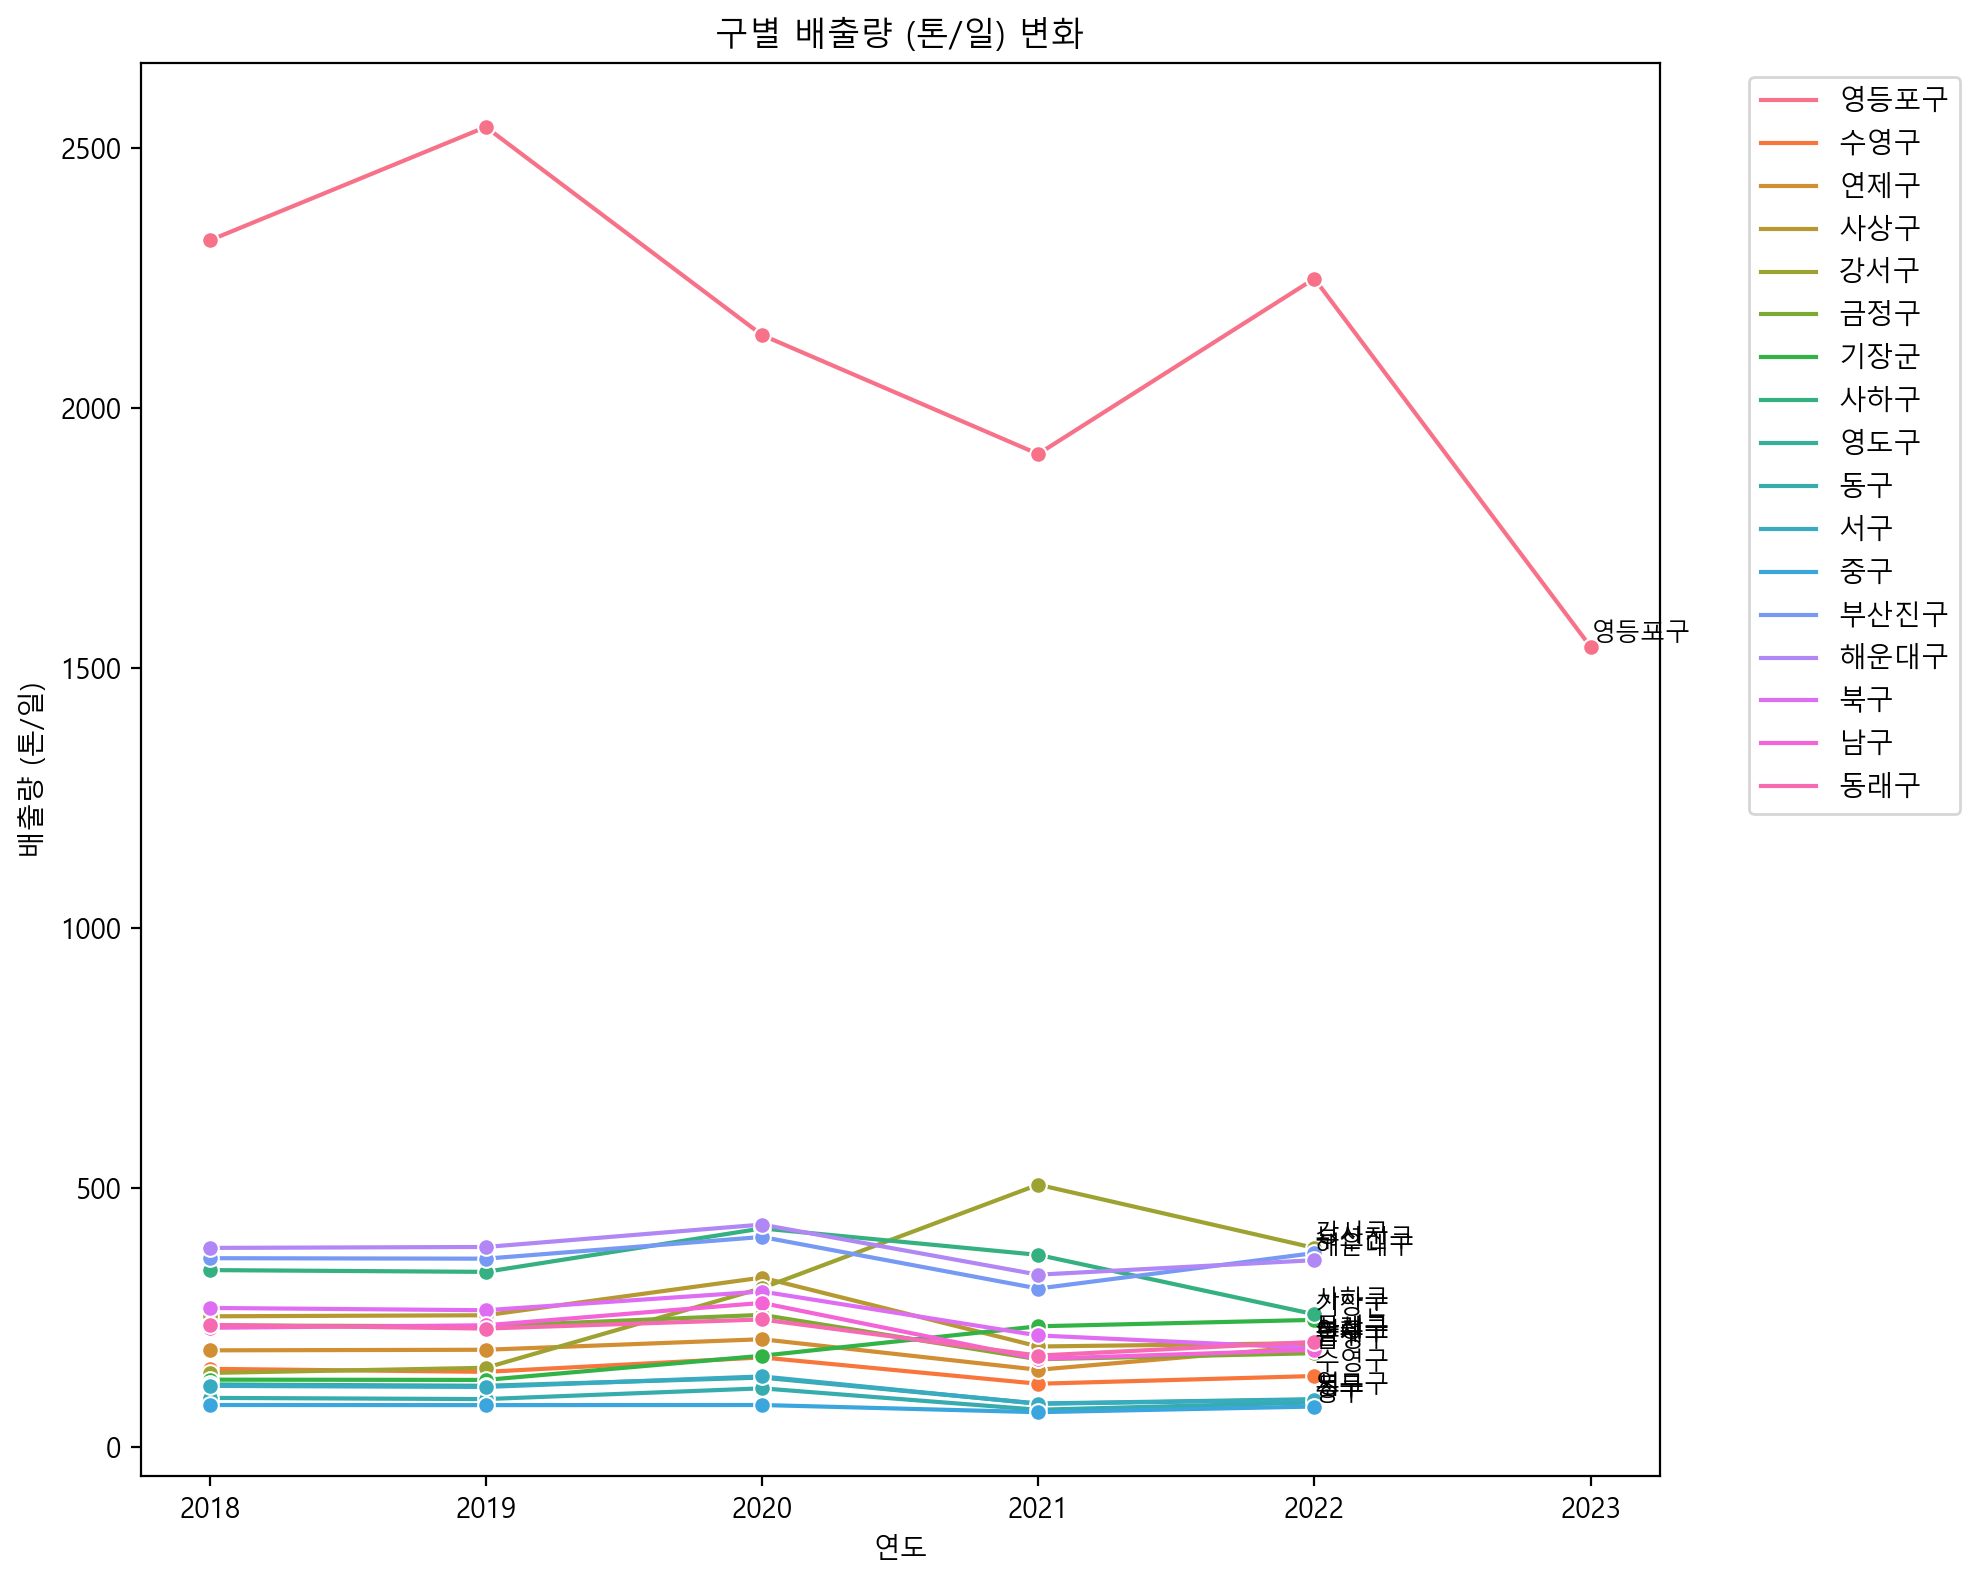

In [51]:
# 필터링된 데이터 생성
plot_data = waste_long[
    (waste_long['구'] == '영등포구') |
    ((waste_long['구'] != '영등포구') & (waste_long['연도'] != '2023'))
]

# 배출량 (톤/일) 시각화
plt.figure(figsize=(10, 8))
sns.lineplot(data=plot_data[plot_data['구분'] == '배출량 (톤/일)'],
             x='연도', y='값', hue='구', marker='o')

# latest year 설정 (영등포구는 2023, 나머지는 2022)
latest_data = waste_long[(waste_long['구분'] == '배출량 (톤/일)') & 
                         (((waste_long['구'] == '영등포구') & (waste_long['연도'] == '2023')) |
                         ((waste_long['구'] != '영등포구') & (waste_long['연도'] == '2022')))]

# 텍스트 출력
for i, row in latest_data.iterrows():
    plt.text(row['연도'], row['값'], row['구'], fontsize=9, ha='left', va='bottom')

plt.title('구별 배출량 (톤/일) 변화')
plt.ylabel('배출량 (톤/일)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

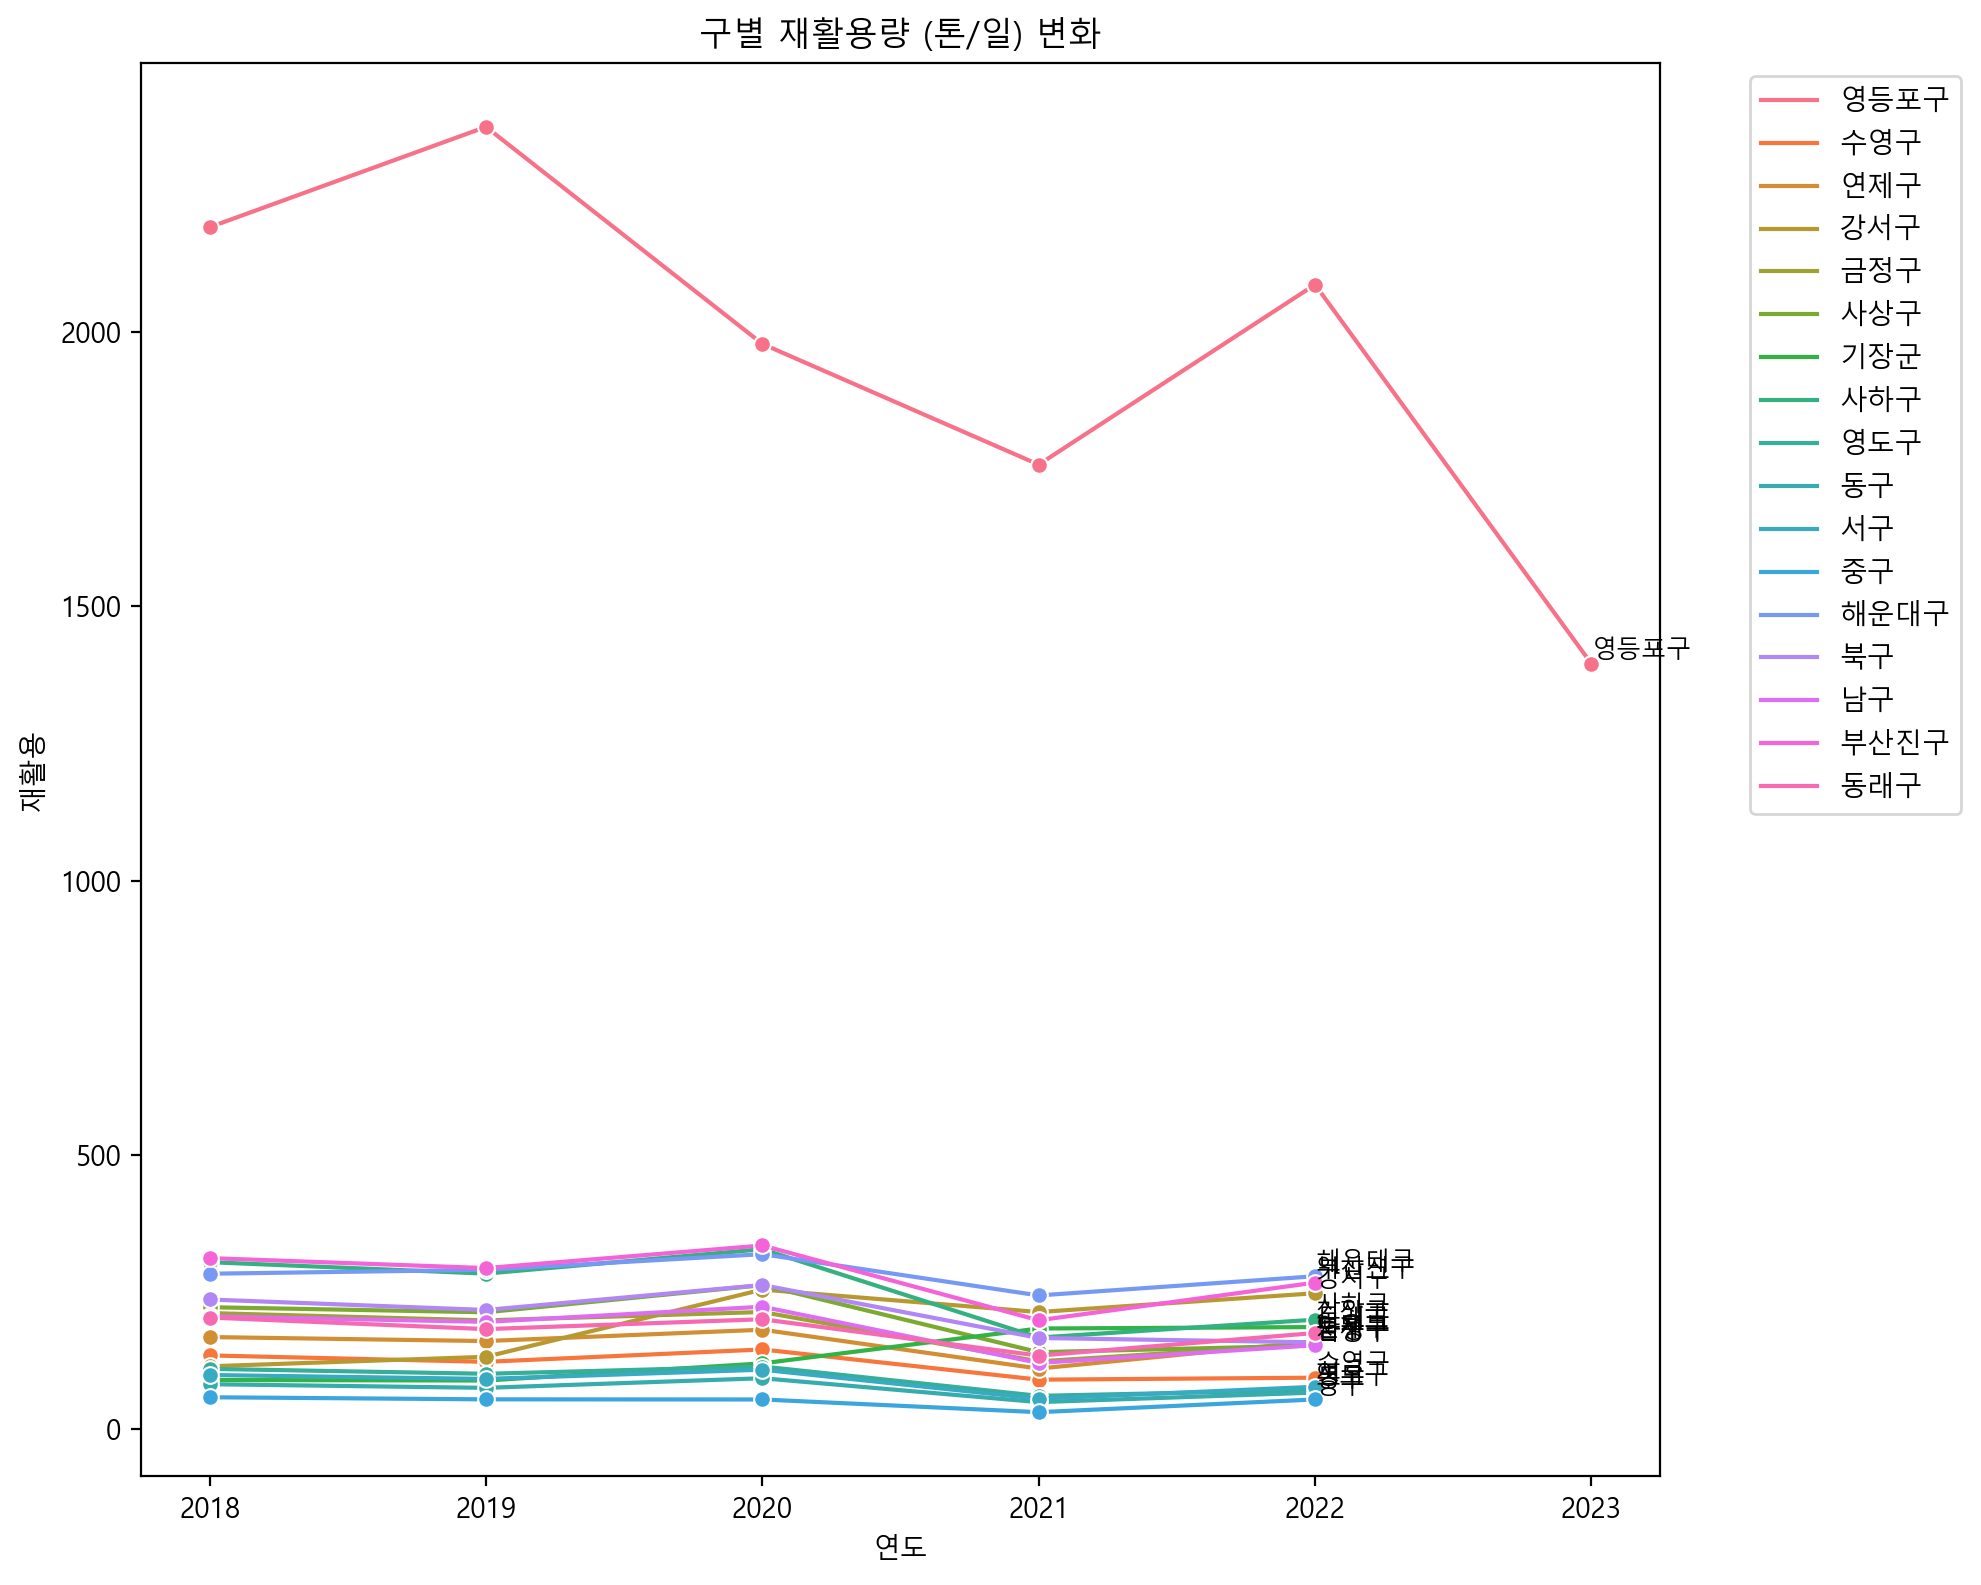

In [53]:
# 필터링된 데이터 생성
plot_data = waste_long[
    (waste_long['구'] == '영등포구') |
    ((waste_long['구'] != '영등포구') & (waste_long['연도'] != '2023'))
]

# 배출량 (톤/일) 시각화
plt.figure(figsize=(10, 8))
sns.lineplot(data=plot_data[plot_data['구분'] == '재활용'],
             x='연도', y='값', hue='구', marker='o')

# latest year 설정 (영등포구는 2023, 나머지는 2022)
latest_data = waste_long[(waste_long['구분'] == '재활용') & 
                         (((waste_long['구'] == '영등포구') & (waste_long['연도'] == '2023')) |
                         ((waste_long['구'] != '영등포구') & (waste_long['연도'] == '2022')))]

# 텍스트 출력
for i, row in latest_data.iterrows():
    plt.text(row['연도'], row['값'], row['구'], fontsize=9, ha='left', va='bottom')

plt.title('구별 재활용량 (톤/일) 변화')
plt.ylabel('재활용')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### 영등포구만 이상하게 많음..
- 매립+소각+재활용을 모두 합친 값이 `배출량 (톤/일)`이었기 때문에 생활 폐기물 기준이라는 건 맞다고 생각

<br><br>

---

## 08. 재활용률 계산 / 시각화
- `재활용률(톤/일 기준) = { 배출량(톤/일) / 재활용(톤/일) } * 100`

In [54]:
# melt로 long-form 준비
waste_long = waste_sorted.melt(id_vars=['구', '구분'],
                               value_vars=year_cols,
                               var_name='연도',
                               value_name='값')

# 배출량과 재활용만 필터링
waste_recycle_calc = waste_long[waste_long['구분'].isin(['배출량 (톤/일)', '재활용'])].copy()

# 구, 연도 기준으로 wide화 (배출량 / 재활용 따로 컬럼으로 만들기)
waste_pivot = waste_recycle_calc.pivot_table(index=['구', '연도'],
                                             columns='구분',
                                             values='값').reset_index()

# 재활용률 계산
waste_pivot['재활용률(%)'] = (waste_pivot['재활용'] / waste_pivot['배출량 (톤/일)']) * 100
waste_pivot.head(3)

구분,구,연도,배출량 (톤/일),재활용,재활용률(%)
0,강서구,2018,143.2,114.2,79.748603
1,강서구,2019,153.1,131.5,85.891574
2,강서구,2020,306.4,254.1,82.930809


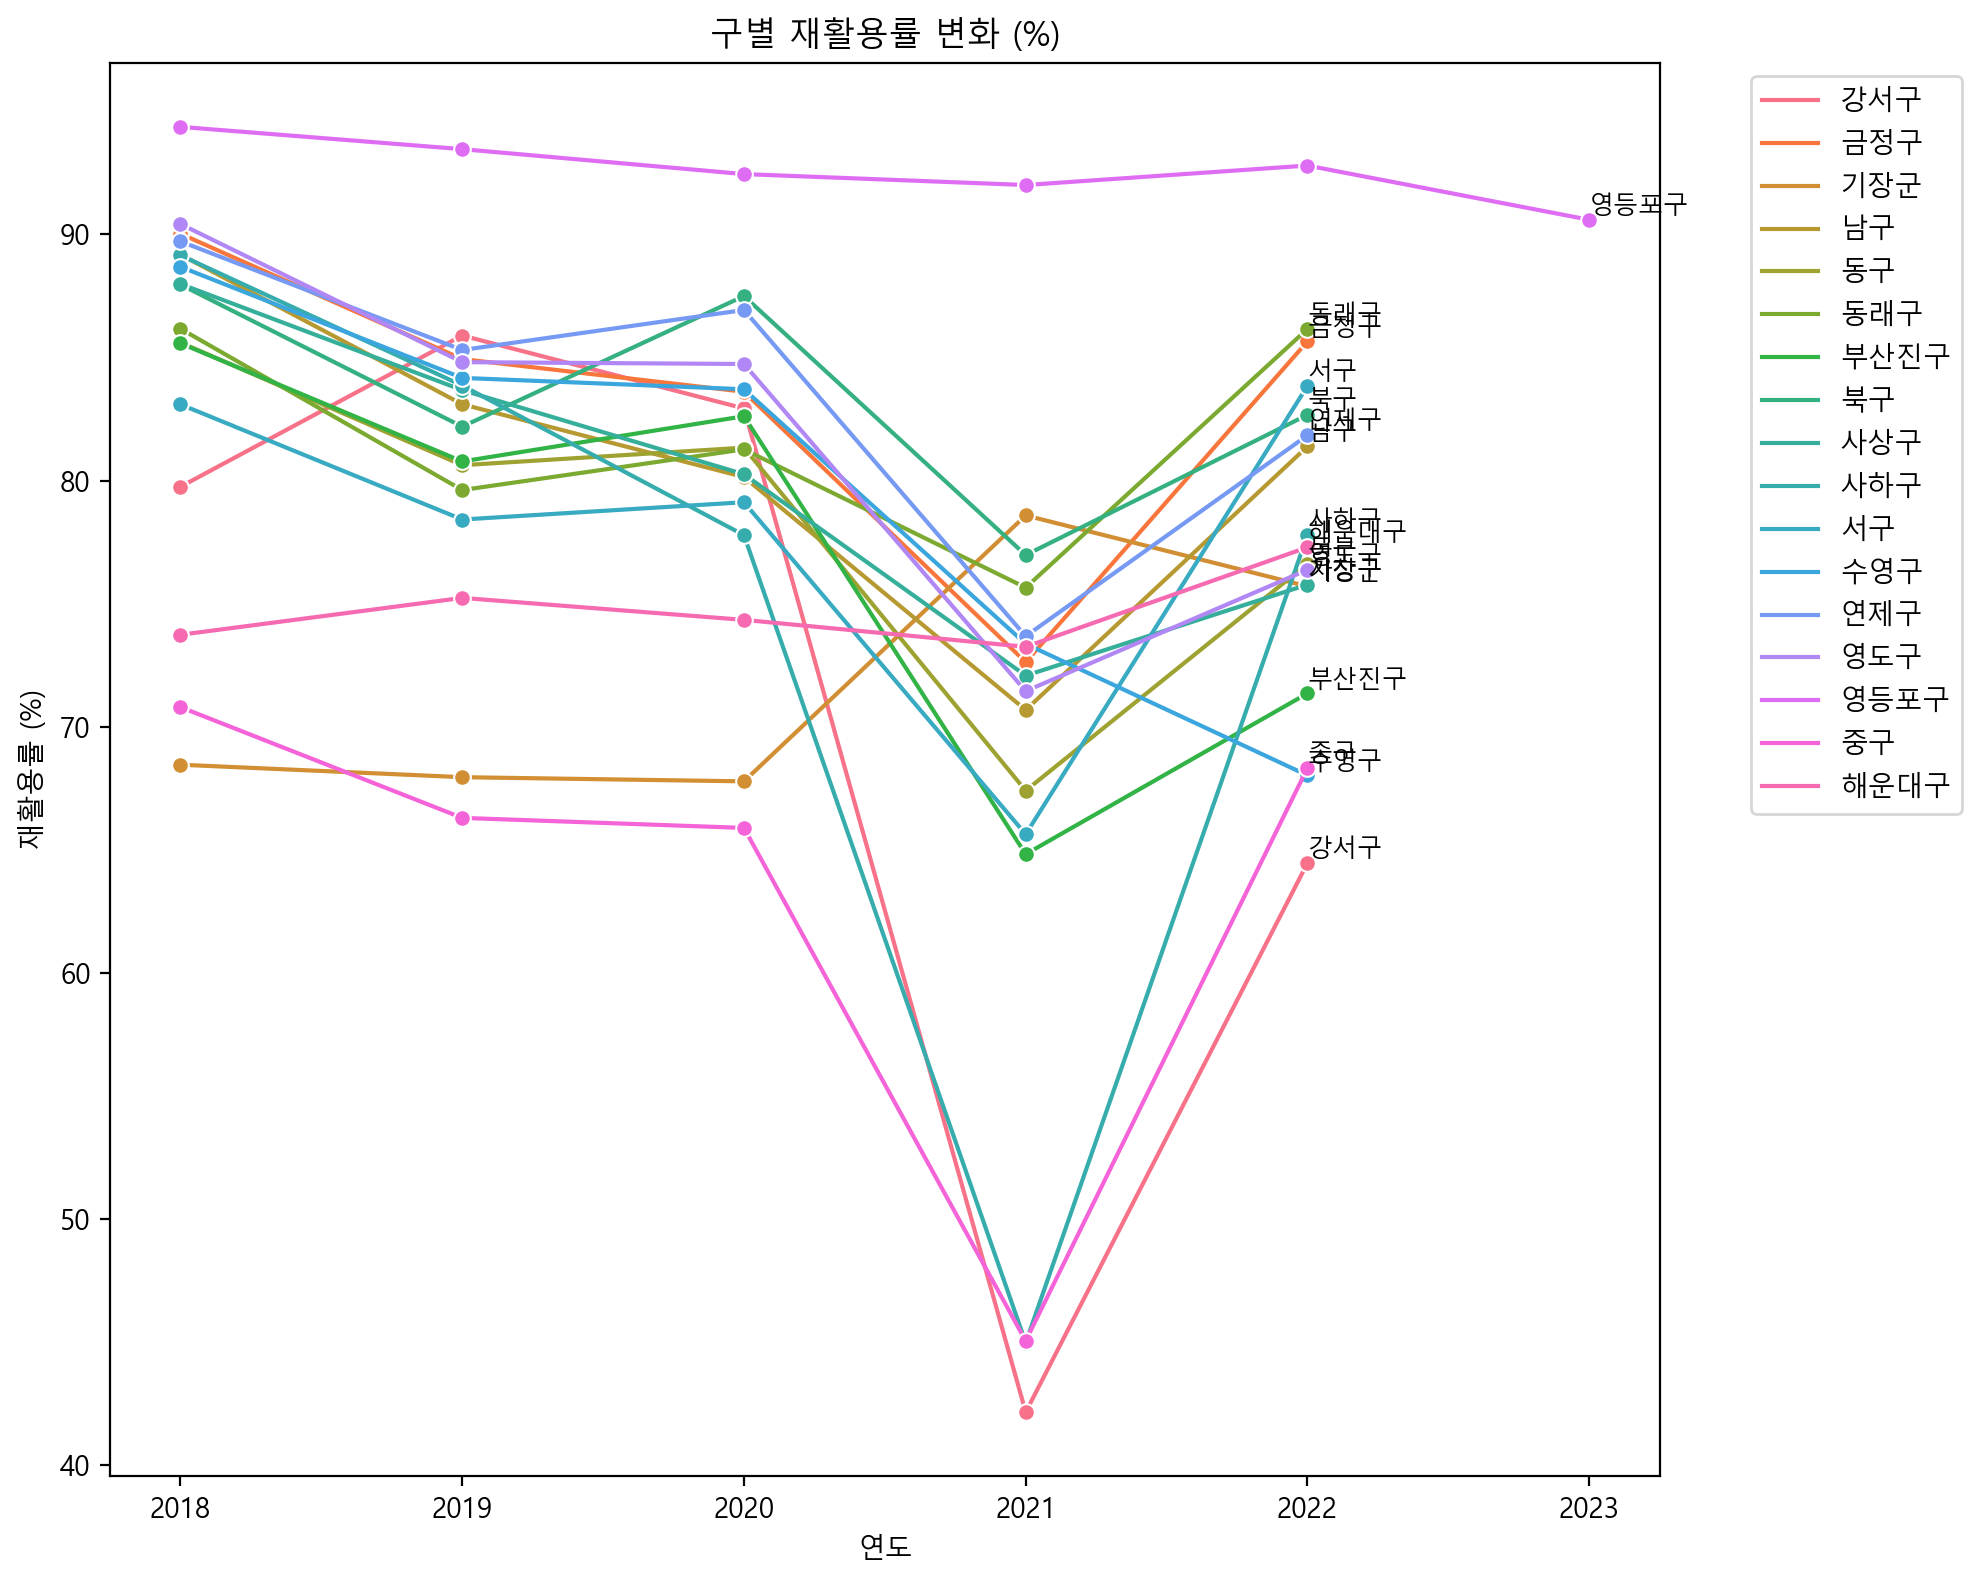

In [55]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=waste_pivot, x='연도', y='재활용률(%)', hue='구', marker='o')

# latest year 설정: 영등포구는 2023, 나머지는 2022
latest_data = waste_pivot[((waste_pivot['구'] == '영등포구') & (waste_pivot['연도'] == '2023')) |
                          ((waste_pivot['구'] != '영등포구') & (waste_pivot['연도'] == '2022'))]

# 텍스트 출력
for i, row in latest_data.iterrows():
    plt.text(row['연도'], row['재활용률(%)'], row['구'], fontsize=9, ha='left', va='bottom')

plt.title('구별 재활용률 변화 (%)')
plt.ylabel('재활용률 (%)')
plt.xlabel('연도')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

<br><br>

---

## 09. 1인당 쓰레기 배출량 계산
- `1인당 배출량 = { 총배출량(톤/일) / 인구 수} * 1000 (kg/일/인)`

In [57]:
# 필요한 컬럼 정의
target_years = ['2018', '2019', '2020', '2021', '2022']

# 쓰레기 데이터에서 '배출량 (톤/일)'만 추출
waste_baechul = waste_sorted[waste_sorted['구분'] == '배출량 (톤/일)'][['구'] + target_years].copy()

# 인구 데이터 준비
population_selected = population_sorted[['구'] + target_years].copy()  # 인구 수 데이터프레임 이름이 population_df 라고 가정

# merge → 구 기준으로 합치기
merged_df = pd.merge(waste_baechul, population_selected, on='구', suffixes=('_배출량', '_인구'))

# 1인당 배출량 계산 → kg/일/명 단위로
result_df = merged_df[['구']].copy()

for year in target_years:
    result_df[year] = (merged_df[f'{year}_배출량'] * 1000) / merged_df[f'{year}_인구']

result_sorted = result_df.sort_values(by='2022', ascending=False).reset_index(drop=True)
result_sorted

,구,2018,2019,2020,2021,2022
0,영등포구,6.314679,6.910122,5.640350,5.072220,5.986291
1,강서구,1.164635,1.181637,2.220982,3.536993,2.680037
2,중구,1.904428,1.939871,1.962768,1.670615,1.980398
3,기장군,0.790348,0.788023,1.010055,1.315455,1.373353
4,부산진구,1.004534,1.014586,1.125078,0.865333,1.050526
5,동구,1.095361,1.053706,1.277826,0.825739,0.999283
6,사상구,1.129114,1.165552,1.536790,0.931838,0.984351
7,연제구,0.898287,0.896870,0.994946,0.720755,0.957570
8,해운대구,0.937591,0.949515,1.065970,0.838214,0.931267
9,서구,1.070259,1.074573,1.262311,0.796851,0.870789
